<font size="5">Installing the packages.</font>

In [1]:
pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.4 MB/s eta 0:00:00


In [2]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 10.0 MB/s eta 0:00:00


<font size="5">Importing the Required Libraries.</font>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import GridSearchCV
import optuna
from optuna import visualization
from optuna.samplers import TPESampler

from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix, auc

# from mlxtend.feature_selection import SequentialFeatureSelector
# from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

import joblib

**Importing the training and label data**

In [9]:
training = pd.read_csv('training_set_features.csv')

In [10]:
training.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  ...             income_poverty  marital_status  \
0                    1.0  ...              Below Poverty     Not Married   
1                    1.0  ...              Below Poverty     Not Married   
2                    0.0  ...  <= $75,000, Above Poverty     Not Married   
3                    0.0  ...              Below Poverty     Not Married   
4                    1.0  ...  <= $75,000, Above Poverty         Married   

   rent_or_own   employment_status  hhs_geo_region                census_msa  \
0          Own  Not in Labor Force        oxchjgsf                   Non-MSA   
1         Rent            Employed        bhuqouqj  MSA, Not Principle  City   
2          Own            Employed        qufhixun  MSA, Not Principle  City   
3         Rent  Not in Labor Force        lrircsnp       MSA, Principle City   
4          Own            Employed        qufhixun  MSA, Not Principle  City   

   household_adults  household_children  employment_industry  \
0               0.0                 0.0                  NaN   
1               0.0                 0.0             pxcmvdjn   
2               2.0                 0.0             rucpziij   
3               0.0                 0.0                  NaN   
4               1.0                 0.0             wxleyezf   

   employment_occupation  
0                    NaN  
1               xgwztkwe  
2               xtkaffoo  
3                    NaN  
4               emcorrxb  

[5 rows x 36 columns]

In [4]:
label = pd.read_csv('training_set_labels.csv')

In [5]:
label.shape

(26707, 3)

In [13]:
training.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

<font size="5">Performing Descriptive Analysis</font>

In [14]:
training.shape 

(26707, 36)

In [15]:
training.info()      # The datatpes are Float 64 and Object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [16]:
training.describe()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count   26707.000000  26615.000000    26591.000000               26636.000000   
mean    13353.000000      1.618486        1.262532                   0.048844   
std      7709.791156      0.910311        0.618149                   0.215545   
min         0.000000      0.000000        0.000000                   0.000000   
25%      6676.500000      1.000000        1.000000                   0.000000   
50%     13353.000000      2.000000        1.000000                   0.000000   
75%     20029.500000      2.000000        2.000000                   0.000000   
max     26706.000000      3.000000        2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          26499.000000          26688.000000           26665.000000   
mean               0.725612              0.068982               0.825614   
std                0.446214              0.253429               0.379448   
min                0.000000              0.000000               0.000000   
25%                0.000000              0.000000               1.000000   
50%                1.000000              0.000000               1.000000   
75%                1.000000              0.000000               1.000000   
max                1.000000              1.000000               1.000000   

       behavioral_large_gatherings  behavioral_outside_home  \
count                  26620.00000             26625.000000   
mean                       0.35864                 0.337315   
std                        0.47961                 0.472802   
min                        0.00000                 0.000000   
25%                        0.00000                 0.000000   
50%                        0.00000                 0.000000   
75%                        1.00000                 1.000000   
max                        1.00000                 1.000000   

       behavioral_touch_face  ...  health_worker  health_insurance  \
count           26579.000000  ...   25903.000000       14433.00000   
mean                0.677264  ...       0.111918           0.87972   
std                 0.467531  ...       0.315271           0.32530   
min                 0.000000  ...       0.000000           0.00000   
25%                 0.000000  ...       0.000000           1.00000   
50%                 1.000000  ...       0.000000           1.00000   
75%                 1.000000  ...       0.000000           1.00000   
max                 1.000000  ...       1.000000           1.00000   

       opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
count                 26316.000000       26319.000000   
mean                      3.850623           2.342566   
std                       1.007436           1.285539   
min                       1.000000           1.000000   
25%                       3.000000           1.000000   
50%                       4.000000           2.000000   
75%                       5.000000           4.000000   
max                       5.000000           5.000000   

       opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
count                 26312.000000                 26245.000000   
mean                      2.357670                     4.025986   
std                       1.362766                     1.086565   
min                       1.000000                     1.000000   
25%                       1.000000                     4.000000   
50%                       2.000000                     4.000000   
75%                       4.000000                     5.000000   
max                       5.000000                     5.000000   

       opinion_seas_risk  opinion_seas_sick_from_vacc  household_adults  \
count       26193.000000                 26170.000000      26458.000000   
mean            2.719162                     2.118112          0.886499   
std             1.385055                     1.332

**Most occurence values in the features - Mode**

In [17]:
training.mode().iloc[0]

respondent_id                                          0
h1n1_concern                                         2.0
h1n1_knowledge                                       1.0
behavioral_antiviral_meds                            0.0
behavioral_avoidance                                 1.0
behavioral_face_mask                                 0.0
behavioral_wash_hands                                1.0
behavioral_large_gatherings                          0.0
behavioral_outside_home                              0.0
behavioral_touch_face                                1.0
doctor_recc_h1n1                                     0.0
doctor_recc_seasonal                                 0.0
chronic_med_condition                                0.0
child_under_6_months                                 0.0
health_worker                                        0.0
health_insurance                                     1.0
opinion_h1n1_vacc_effective                          4.0
opinion_h1n1_risk              

**Distribution of Data in the features**

In [18]:
label['h1n1_vaccine'].value_counts()   # label 1 -> H1N1 vaccine 

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [19]:
label['seasonal_vaccine'].value_counts()  # label 1 -> Seasonal vaccine 

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

In [20]:
label.isna().sum()              # Checking null values in labels

respondent_id       0
h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

In [21]:
training['chronic_med_condition'].value_counts() # People who have chronic med condition

0.0    18446
1.0     7290
Name: chronic_med_condition, dtype: int64

In [22]:
training['doctor_recc_h1n1'].value_counts() # Doctors recommended H1N1 Vaccine

0.0    19139
1.0     5408
Name: doctor_recc_h1n1, dtype: int64

In [23]:
training['doctor_recc_seasonal'].value_counts()  # Doctors recommended Seasonal Vaccine

0.0    16453
1.0     8094
Name: doctor_recc_seasonal, dtype: int64

In [24]:
training['child_under_6_months'].value_counts()   # Child under 6 months in home

0.0    23749
1.0     2138
Name: child_under_6_months, dtype: int64

In [25]:
training['age_group'].value_counts()              # age group counts from each category

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64

In [26]:
training['h1n1_concern'].value_counts()

2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_concern, dtype: int64

In [27]:
training['h1n1_knowledge'].value_counts()

1.0    14598
2.0     9487
0.0     2506
Name: h1n1_knowledge, dtype: int64

- Combining training and labels for further analysis

        df_D denotes dataframe for analysing distribution

In [28]:
df_D = pd.merge(training, label, on='respondent_id')

**- H1N1 concern Vs H1N1 Vaccination uptake**

In [29]:
df_D[df_D['h1n1_concern'] == 3]['h1n1_vaccine'].value_counts()      # -> Very concern

0    3250
1    1341
Name: h1n1_vaccine, dtype: int64

In [30]:
df_D[df_D['h1n1_concern'] == 2]['h1n1_vaccine'].value_counts()      # -> Somewhat contern

0    8102
1    2473
Name: h1n1_vaccine, dtype: int64

**- H1N1 Knowledge Vs H1N1 Vaccination uptake**

In [31]:
df_D[df_D['h1n1_knowledge'] == 2]['h1n1_vaccine'].value_counts()     # -> A lot of Knowledge

0    6849
1    2638
Name: h1n1_vaccine, dtype: int64

In [32]:
df_D[df_D['h1n1_knowledge'] == 1]['h1n1_vaccine'].value_counts()     # -> Little Knowledge

0    11945
1     2653
Name: h1n1_vaccine, dtype: int64

**- COMPARING CONCERN and KNOWLEDGE**

In [33]:
df_D[(df_D['h1n1_knowledge'] == 2) & (df_D['h1n1_concern'] == 3)]['h1n1_vaccine'].value_counts() 

0    1087
1     652
Name: h1n1_vaccine, dtype: int64

**- COMPARING Behaviour antiviral meds and Vaccine uptake**

In [34]:
df_D['behavioral_antiviral_meds'].value_counts()

0.0    25335
1.0     1301
Name: behavioral_antiviral_meds, dtype: int64

In [35]:
df_D[df_D['behavioral_antiviral_meds'] == 1]['h1n1_vaccine'].value_counts()

0    930
1    371
Name: h1n1_vaccine, dtype: int64

**- Analysing Health Insurance**

In [36]:
df_D['health_insurance'].value_counts()

1.0    12697
0.0     1736
Name: health_insurance, dtype: int64

In [37]:
(12697 / (12697+1736))*100      # -> Calculating health insurance percentage

87.97200859142244

**- People worrying about getting sick from getting vaccination**

In [38]:
df_D['opinion_seas_sick_from_vacc'].isin([4,5]).sum()

6573

In [39]:
(6573/26707)*100                # -> Seasonal

24.611525068334146

In [40]:
df_D['opinion_h1n1_sick_from_vacc'].isin([4,5]).sum()

8037

In [41]:
(8037/26707)*100                # -> Calculating H1N1 percentage

30.093233983599806

**- People opinion on vaccination effective**

In [42]:
df_D['opinion_seas_vacc_effective'].isin([4,5]).sum()

21602

In [43]:
(21606/26707)*100              # -> Calculating seasonal percentage

80.90013854045756

In [44]:
df_D['opinion_h1n1_vacc_effective'].isin([4,5]).sum()

18849

In [45]:
(18849/26707)*100              # -> Calculating H1N1 percentage

70.57700228404538

**separating columns according to the datatype**

In [46]:
numeric_columns = training.select_dtypes('number').columns

category_columns = ['race', 'sex', 'marital_status', 'rent_or_own',  'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation']

ordinal_columns = ['age_group', 'education', 'income_poverty', 'employment_status']

<font size="5">Exploratory Data Analysis</font>    

**- Comparing the level of H1N1 'Concern' and 'Knowledge' among people**

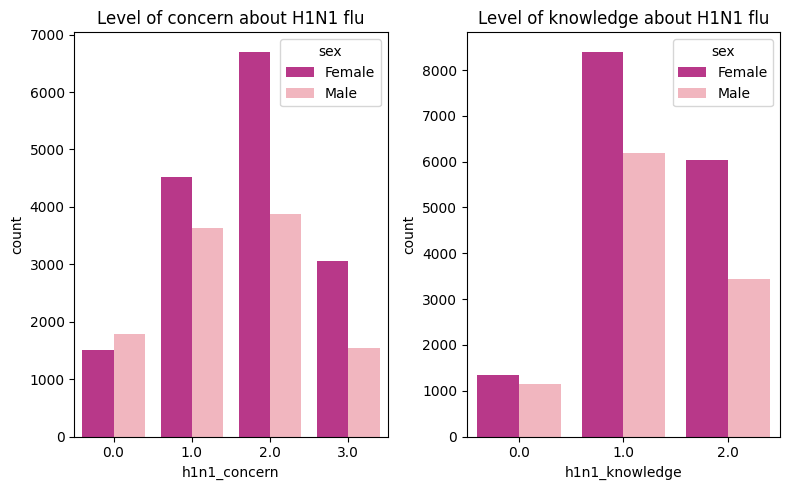

In [47]:
fig,axes = plt.subplots(ncols=2, figsize=(8,5))

sns.countplot(x='h1n1_concern', data = training, ax=axes[0], hue='sex', palette='RdPu_r')
sns.countplot(x='h1n1_knowledge', data = training, ax=axes[1], hue='sex', palette='RdPu_r')

fig.subplots_adjust(wspace=0.6)

axes[0].set_title('Level of concern about H1N1 flu')
axes[1].set_title('Level of knowledge about H1N1 flu')

plt.tight_layout()
plt.show()

**- Doctors Recommended H1N1 and Seasonal Flu Vaccine**

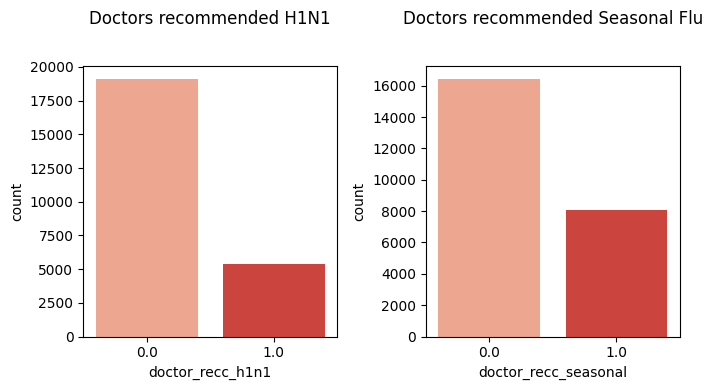

In [48]:
fig,axes = plt.subplots(ncols=2, figsize=(7,4))

sns.countplot(x='doctor_recc_h1n1', data = training, ax=axes[0], palette='Reds')
sns.countplot(x='doctor_recc_seasonal', data = training, ax=axes[1],palette='Reds')

fig.subplots_adjust(wspace=0.6)

axes[0].set_title('Doctors recommended H1N1', pad=30)
axes[1].set_title('Doctors recommended Seasonal Flu', pad=30)

plt.tight_layout()
plt.show()

**- People having Chronic Medical Condition by SEX**

<Axes: xlabel='chronic_med_condition', ylabel='count'>

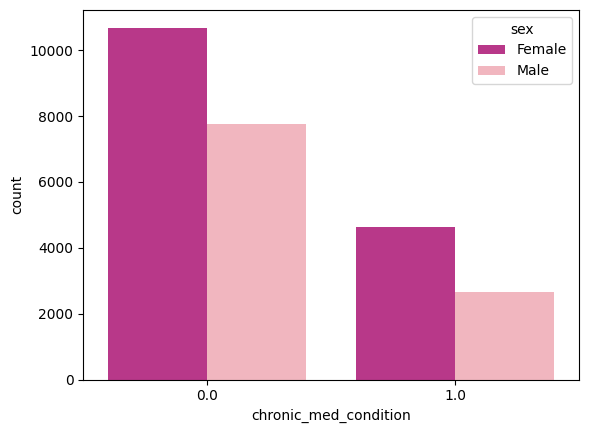

In [49]:
sns.countplot(x='chronic_med_condition', data = training, hue='sex', palette='RdPu_r')

**- Chronic Medical Condition by 'Age Group'**

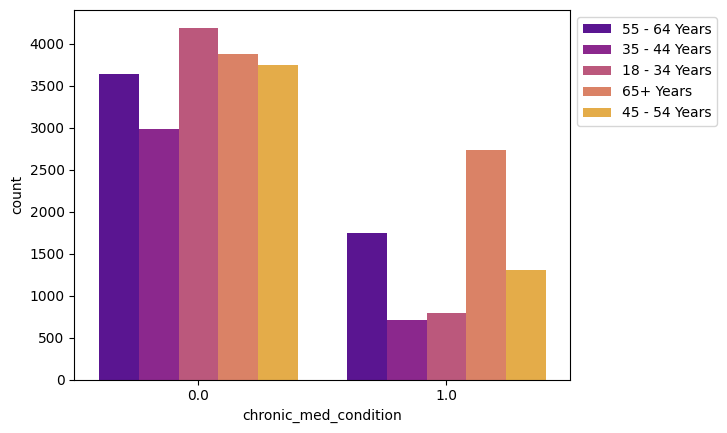

In [50]:
sns.countplot(x='chronic_med_condition', data = training, hue='age_group', palette='plasma')
plt.legend(bbox_to_anchor = (1,1), loc = 'upper left')

**- Comparing respondent's worry of getting SICK from taking 'H1N1' and 'Seasonal Flu' vaccine**

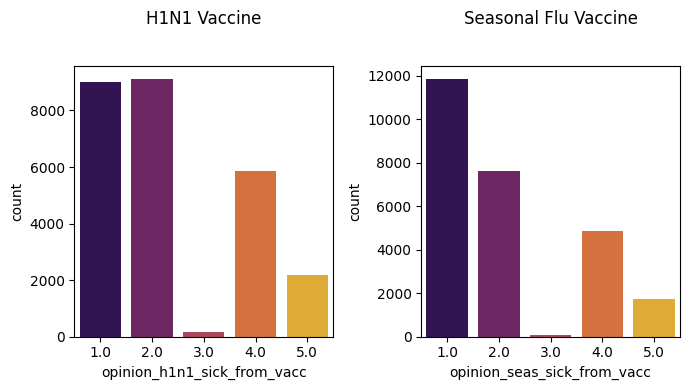

In [51]:
fig,axes = plt.subplots(ncols=2, figsize=(7,4))

sns.countplot(x='opinion_h1n1_sick_from_vacc', data = training, ax=axes[0], palette='inferno')
sns.countplot(x='opinion_seas_sick_from_vacc', data = training, ax=axes[1], palette='inferno')

fig.subplots_adjust(wspace=0.6)

axes[0].set_title('H1N1 Vaccine', pad=30)
axes[1].set_title('Seasonal Flu Vaccine', pad=30)
plt.tight_layout()
plt.show()

**- Comparing respondent's opinion about RISK of getting sick with 'H1N1' and 'Seasonal flu' without vaccine**

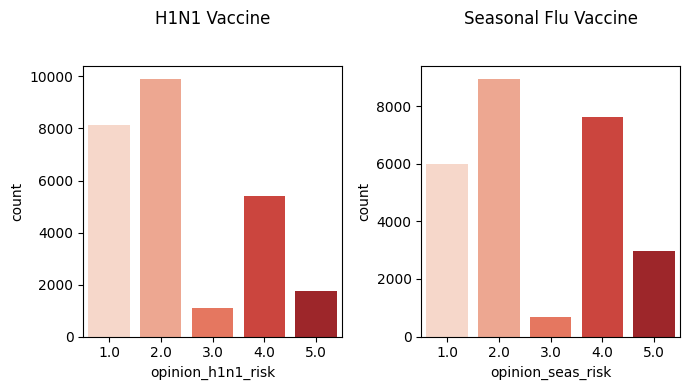

In [52]:
fig,axes = plt.subplots(ncols=2, figsize=(7,4))

sns.countplot(x='opinion_h1n1_risk', data = training, ax=axes[0], palette='Reds')
sns.countplot(x='opinion_seas_risk', data = training, ax=axes[1], palette='Reds')


axes[0].set_title('H1N1 Vaccine', pad=30)
axes[1].set_title('Seasonal Flu Vaccine', pad=30)

plt.tight_layout()
plt.show()

**- Comparing respondent's opinion about 'H1N1' and 'Seasonal Flu' vaccine EFFECTIVENESS**

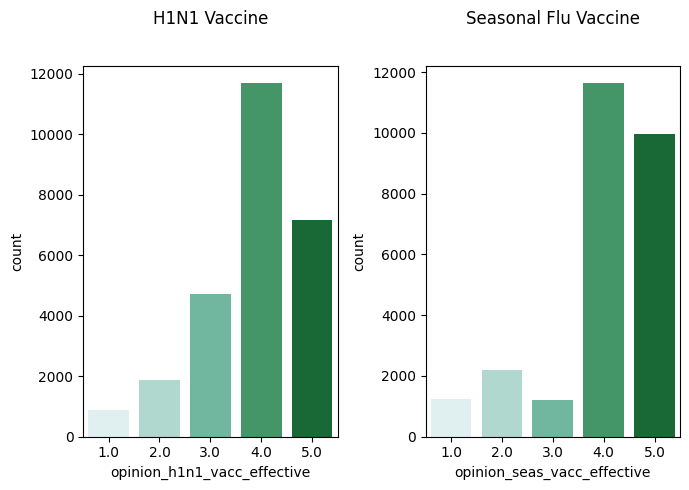

In [53]:
fig,axes = plt.subplots(ncols=2, figsize=(7,5))

sns.countplot(x='opinion_h1n1_vacc_effective', data = training, ax=axes[0], palette='BuGn')
sns.countplot(x='opinion_seas_vacc_effective', data = training, ax=axes[1], palette='BuGn')

axes[0].set_title('H1N1 Vaccine', pad=30)
axes[1].set_title('Seasonal Flu Vaccine', pad=30)

plt.tight_layout()
plt.show()

**- Comparing Number of Household 'Adults' and 'Children'**

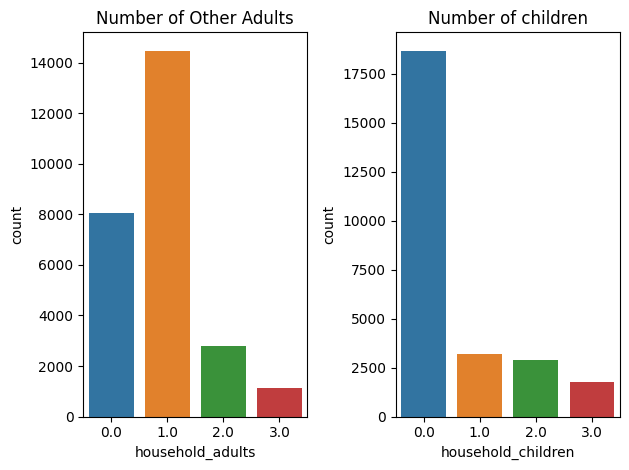

In [54]:
fig,axes = plt.subplots(ncols=2)

sns.countplot(data=training, x='household_adults', ax=axes[0])
sns.countplot(data=training, x='household_children', ax=axes[1])

fig.subplots_adjust(wspace=0.6)

axes[0].set_title('Number of Other Adults')
axes[1].set_title('Number of children')

plt.tight_layout()
plt.show()

**- Comparing 'Employment Status' and 'Income Poverty Level'**

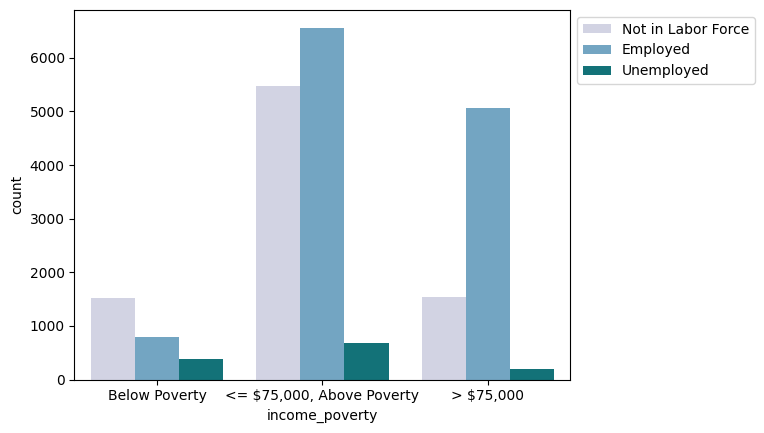

In [55]:
sns.countplot(hue = "employment_status", x = "income_poverty", data=training, palette = 'PuBuGn')
plt.legend(bbox_to_anchor = (1,1), loc = 'upper left')

**- Comparing the 'Employment Status' and 'Health Insurance'**

<Axes: xlabel='health_insurance', ylabel='count'>

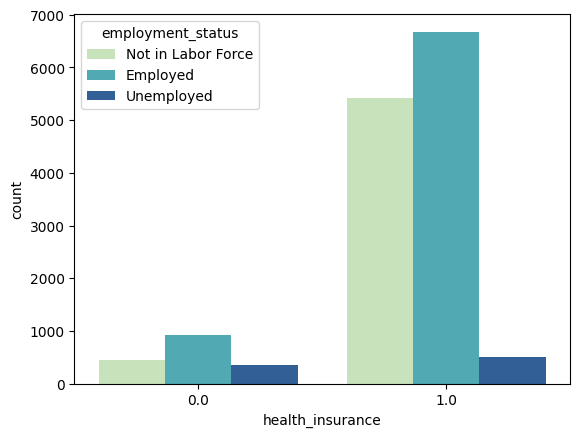

In [56]:
sns.countplot(hue="employment_status", x="health_insurance", data=training, palette='YlGnBu')

**- Comparing 'Housing Situation' of respondent's Income Category'**

<Axes: xlabel='income_poverty', ylabel='count'>

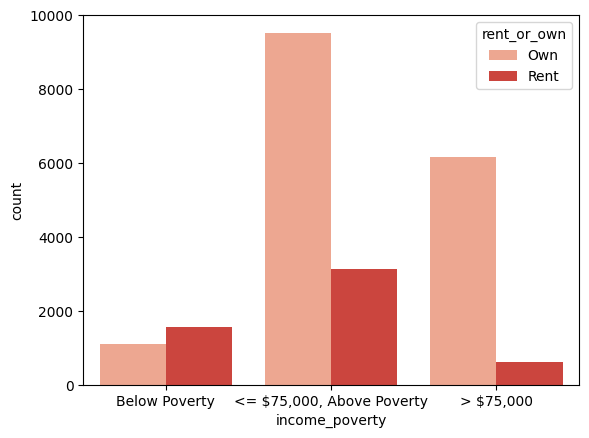

In [57]:
sns.countplot(x='income_poverty', data=training, hue='rent_or_own', palette='Reds')

**- Correlation Plot**

<ipython-input-58-5026ff65170f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(training.corr(),annot=True)


<Axes: >

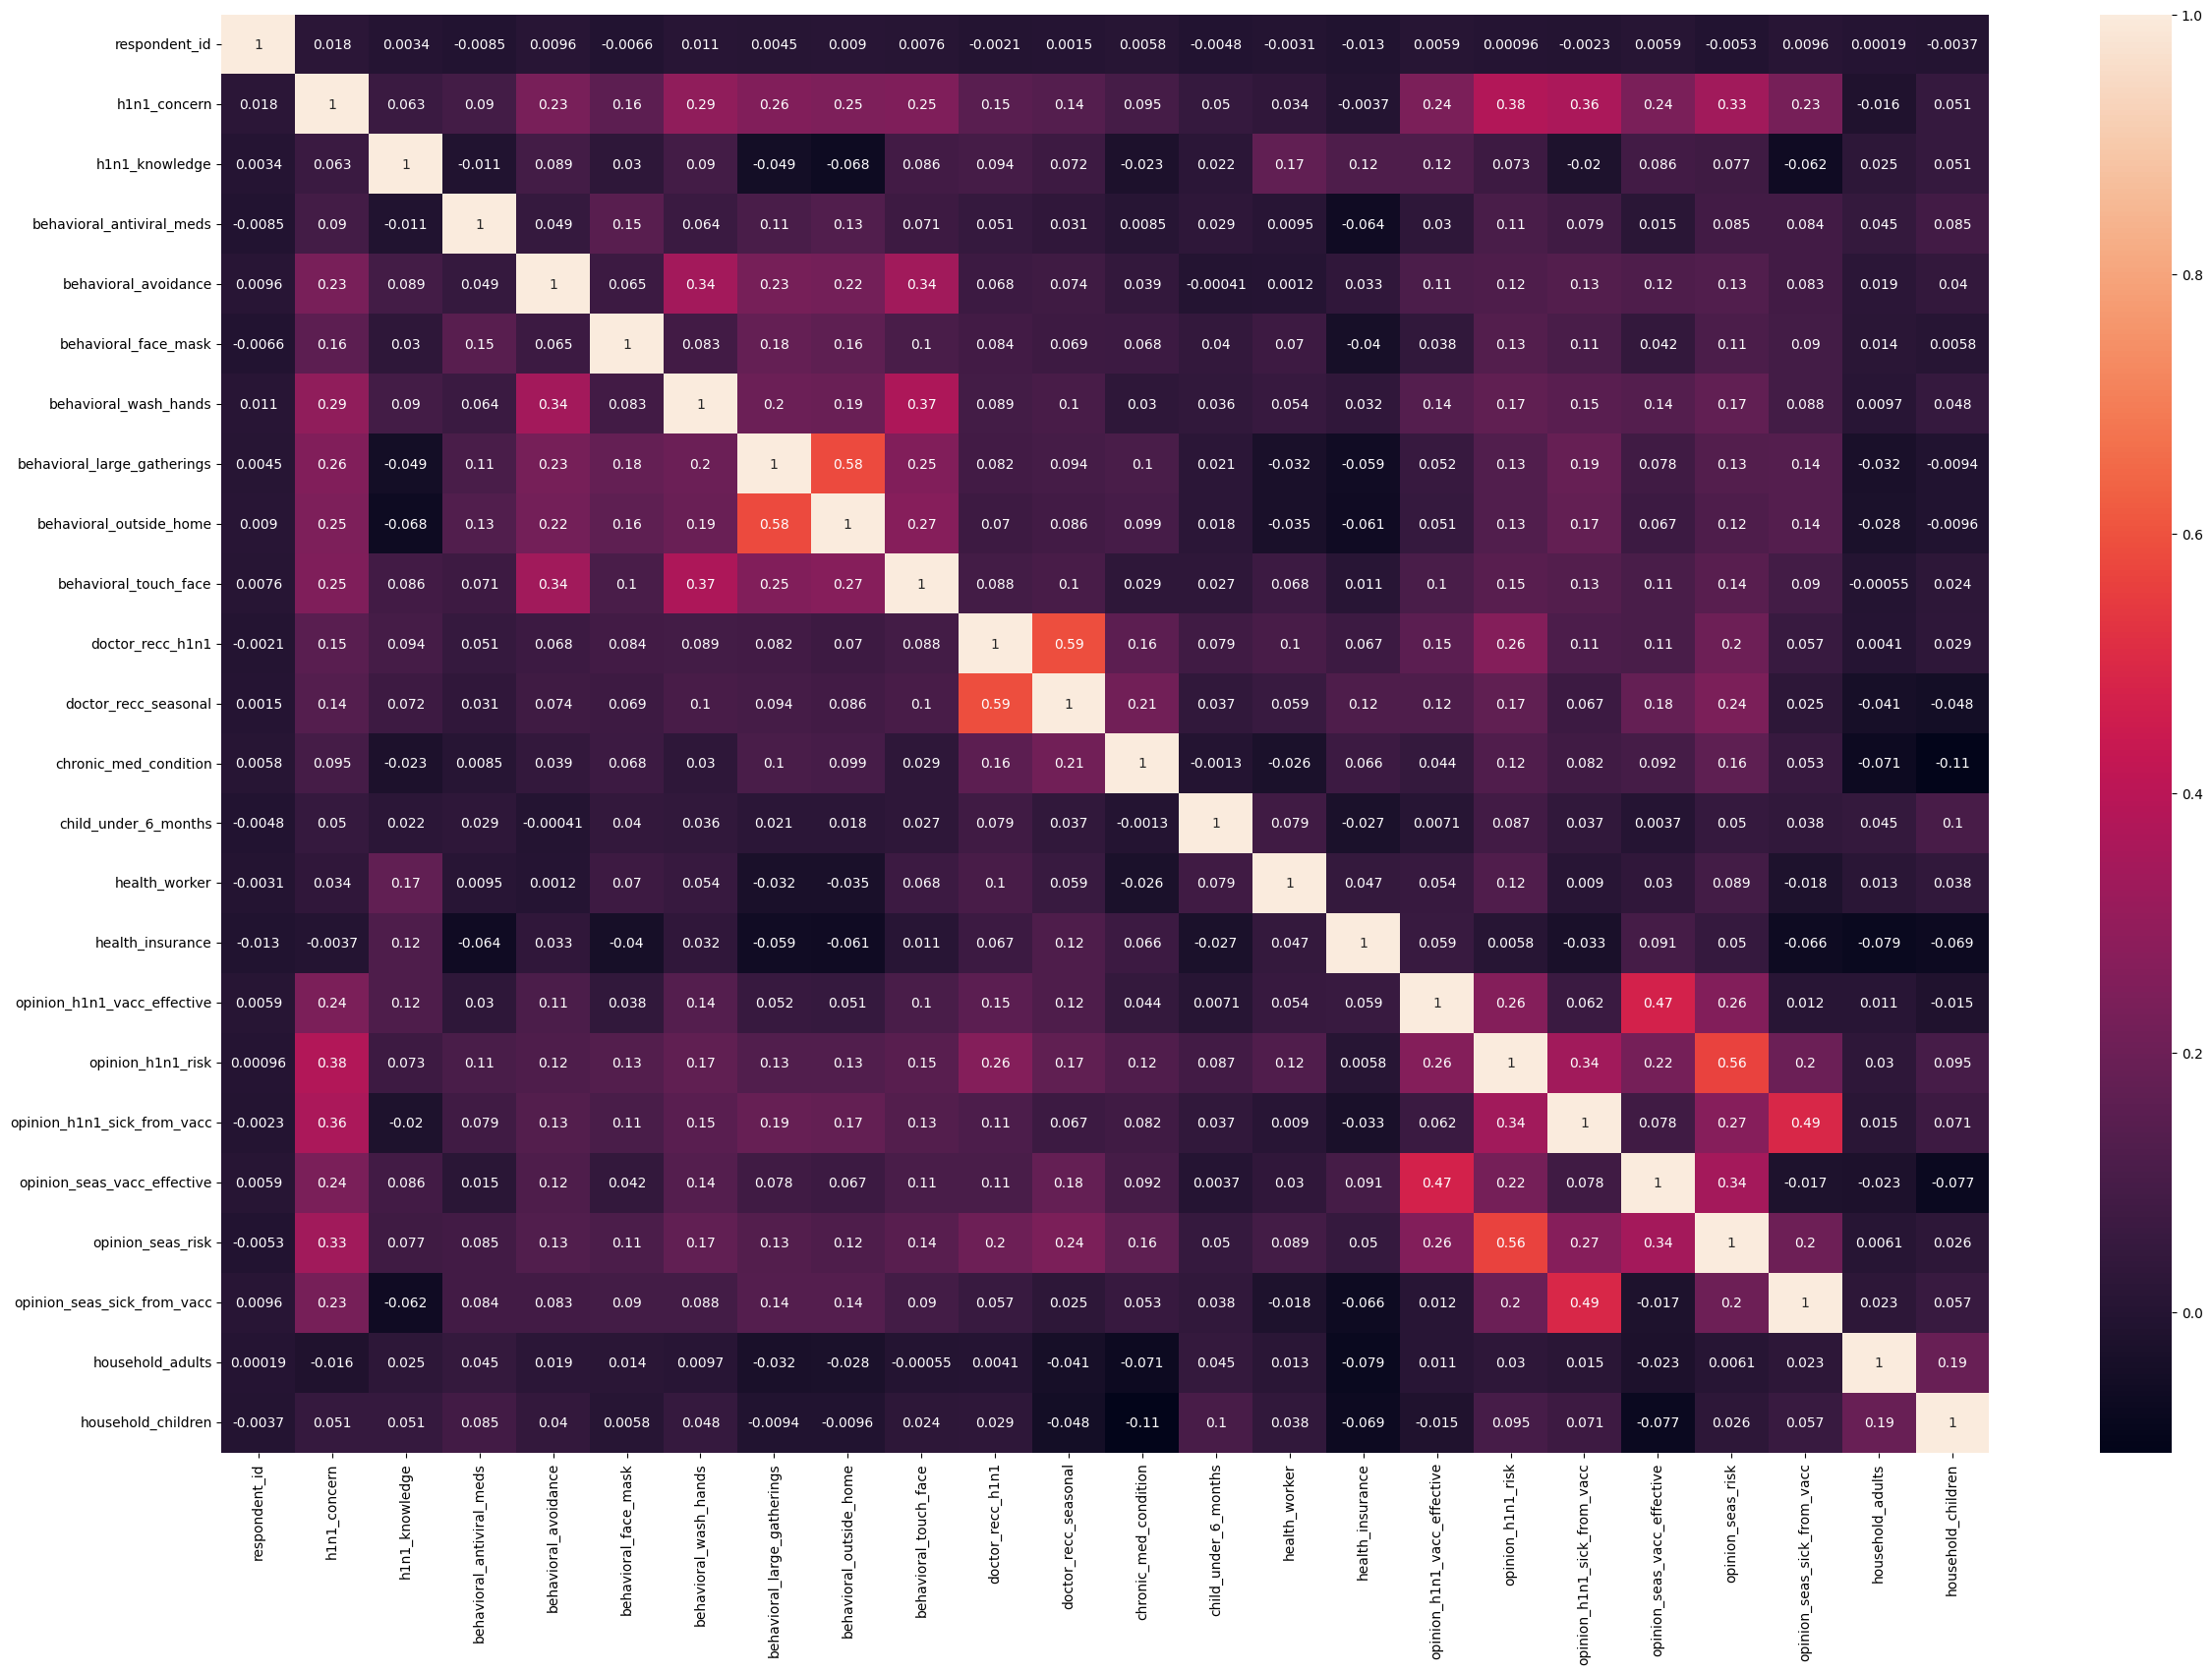

In [58]:
plt.figure(figsize=(29,19))
sns.heatmap(training.corr(),annot=True)

**- Combining all the Behavioural and creating overall_behaviour_score**

In [59]:
training_behaviour = training.copy()

In [60]:
training_behaviour['overall_behaviour_score'] = training_behaviour['behavioral_antiviral_meds'] + \
training_behaviour['behavioral_avoidance'] + training_behaviour['behavioral_face_mask'] + \
training_behaviour['behavioral_wash_hands'] + training_behaviour['behavioral_large_gatherings'] + \
training_behaviour['behavioral_outside_home'] + training_behaviour['behavioral_touch_face']

**- Checking the distribution for overall behaviour score**

<ipython-input-61-f5669b02c857>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(training_behaviour['overall_behaviour_score'])


<Axes: xlabel='overall_behaviour_score', ylabel='Density'>

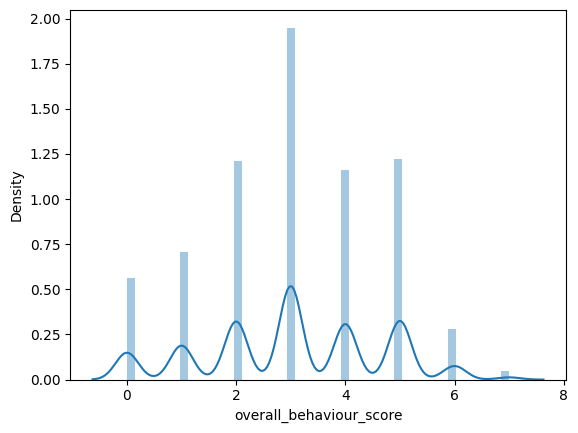

In [61]:
sns.distplot(training_behaviour['overall_behaviour_score'])

**- Comparing the behavioural score**

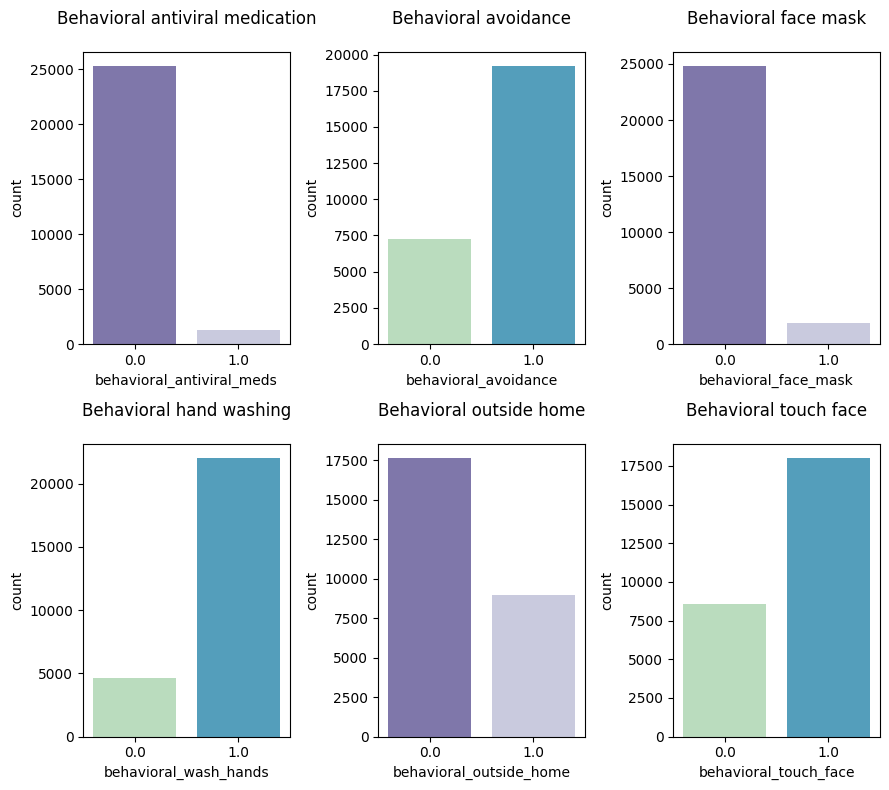

In [62]:
fig,axes = plt.subplots(nrows=2, ncols=3, figsize=(9,8))

sns.countplot(x='behavioral_antiviral_meds', data = training, ax=axes[0,0], palette='Purples_r')
sns.countplot(x='behavioral_avoidance', data = training, ax=axes[0,1], palette='GnBu')
sns.countplot(x='behavioral_face_mask', data = training, ax=axes[0,2],palette='Purples_r')
sns.countplot(x='behavioral_wash_hands', data = training, ax=axes[1,0], palette='GnBu')
sns.countplot(x='behavioral_outside_home', data = training, ax=axes[1,1], palette='Purples_r')
sns.countplot(x='behavioral_touch_face', data = training, ax=axes[1,2], palette='GnBu')

fig.subplots_adjust( wspace=0.4)


axes[0,0].set_title('Behavioral antiviral medication', pad=20)
axes[0,1].set_title('Behavioral avoidance', pad=20)
axes[0,2].set_title('Behavioral face mask', pad=20)
axes[1,0].set_title('Behavioral hand washing', pad=20)
axes[1,1].set_title('Behavioral outside home', pad=20)
axes[1,2].set_title('Behavioral touch face', pad=20)


plt.tight_layout()

plt.show()

<font size="5">Exploring Missing Data</font>

**- Checking the Total Number of Missing Value**

In [63]:
training.isnull().sum() 

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

**- Creating a Function which returns Missing Value which is above zero in percentage**

In [64]:
def percentage_missing(training):
    
    percent_nan = 100 * training.isnull().sum() / len(training)
    percent_nan = percent_nan[percent_nan > 0].sort_values() 
    
    return percent_nan

In [65]:
percentage_nan = percentage_missing(training)

In [66]:
percentage_nan

behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_antiviral_meds       0.265848
behavioral_outside_home         0.307036
behavioral_large_gatherings     0.325757
h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_touch_face           0.479275
behavioral_avoidance            0.778822
household_children              0.932340
household_adults                0.932340
opinion_h1n1_risk               1.452803
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
health_worker                   3.010447
child_under_6_months            3.070356
chronic_med_condition           3.635751
education                       5.268282
marital_status                  5.272026
employment_status               5.477965
rent_or_own                     7.645936
doctor_recc_h1n1

**- Visualisation which represents the missing value percenatge for the Features**

Text(0, 0.5, 'Percentage of missing values')

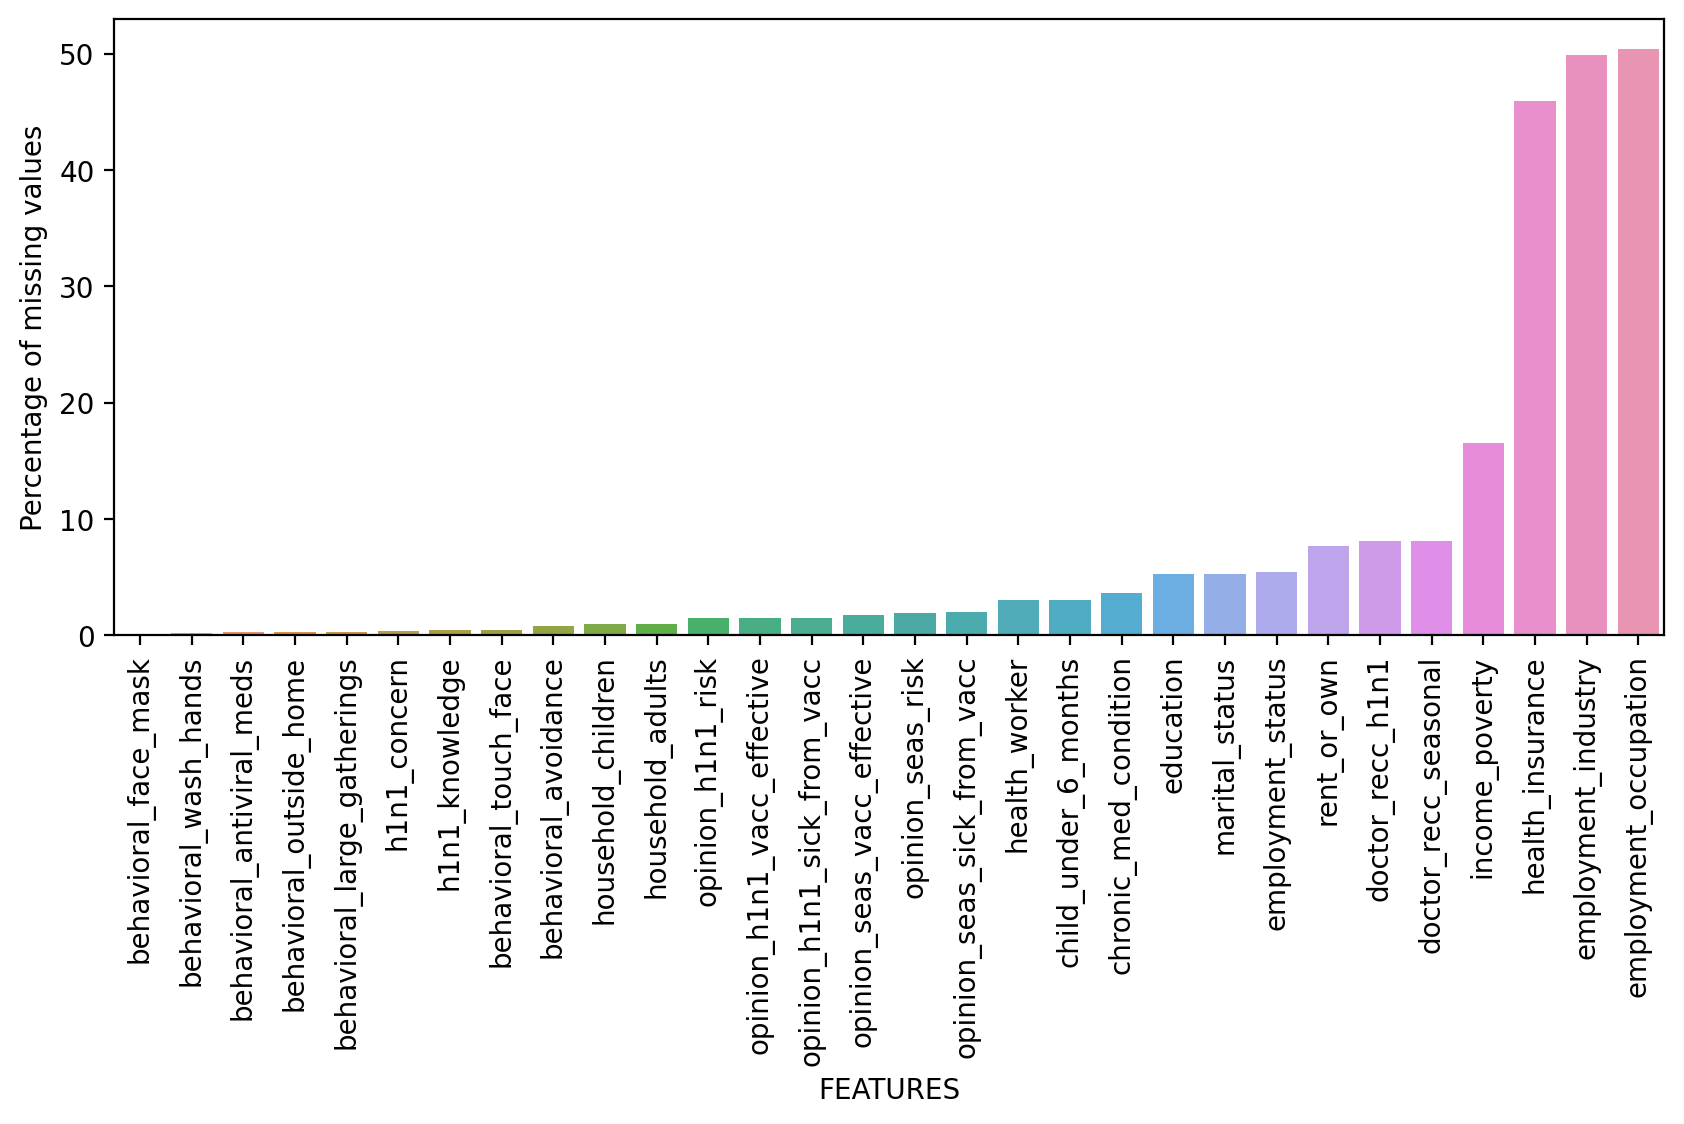

In [67]:
plt.figure(figsize=(10,4), dpi=200)

sns.barplot(x = percentage_nan.index, y = percentage_nan)

plt.xticks(rotation=90)

plt.xlabel('FEATURES')
plt.ylabel('Percentage of missing values')

**- Heatmaps for Analysing Missing Value Patterns**

- From the Heatmap, we can clearly identify some <u>patterns</u> in missing value.

In [68]:
Missing_value_heatmap = px.imshow(training.isnull(), color_continuous_scale='Purples')

Missing_value_heatmap.show()

<font size="3">Checking Categorical Missing Data</font>

**- Checking Missing values for Employment Occupation and Industry Data for Unemployed respondents.** 

- People who are unemployed will have NaN value in employment industry and occupation. As it is understood that these features are not applicable to the respondents which is also confirmed by CDC Quetsionare[1].

In [69]:
training[training["employment_status"]=="Unemployed"][["employment_industry",
                                                                     "employment_occupation"]].isna().sum()

employment_industry      1453
employment_occupation    1453
dtype: int64

**- Checking Missing values for Employment Occupation and Industry Data for 'Not in Labor Force'.** 
- People who are 'Not in Labor Force' will have NaN value in employment industry and occupation. As it is understood that these features are not applicable to the respondents which is also confirmed by CDC Quetsionare[1].

In [70]:
training[training["employment_status"]=="Not in Labor Force"][["employment_industry",
                                                                     "employment_occupation"]].isna().sum()

employment_industry      10231
employment_occupation    10231
dtype: int64

**- Checking Missing values for Employment Occupation and Industry Data for 'Employed People'.**
- Some people who are Employed but still, they have NaN values in the employment industry and occupation. Assuming the respondent has refused to answer this question which was confirmed by CDC Questionare[1].

In [71]:
training[training["employment_status"]=="Employed"][["employment_industry",
                                                           "employment_occupation"]].isna().sum()

employment_industry      183
employment_occupation    323
dtype: int64

<font size="5">Missing Value Imputation for Categorical Data</font> 

**- By : Karthikeyan & Adarsh**

In [72]:
training[category_columns].isna().sum()

race                         0
sex                          0
marital_status            1408
rent_or_own               2042
hhs_geo_region               0
census_msa                   0
employment_industry      13330
employment_occupation    13470
dtype: int64

**- Imputing Missing Value for 'employment_occupation'**

- Assigning missing values for employment_occupation with appropiate imputaion corresponding to their employment status.

In [73]:
for i, row in training[training['employment_occupation'].isna()].iterrows():
    conditions = (training["employment_status"]=="Unemployed")
    if conditions.any():
        training.loc[i, 'employment_occupation'] = 'unemployed_occupation'

In [74]:
for i, row in training[training['employment_occupation'].isna()].iterrows():
    conditions = (training["employment_status"]=="Not in Labor Force")
    if conditions.any():
        training.loc[i, 'employment_occupation'] = 'Not_in_laborforce'

In [75]:
for i, row in training[training['employment_occupation'].isna()].iterrows():
    conditions = (training["employment_status"]=="Employed")
    if conditions.any():
        training.loc[i, 'employment_occupation'] = 'other_occupation'

**- Imputing Missing Value for 'employment_industry'**
- Assigning missing values for employment_industry with appropiate imputaion corresponding to their employment status.

In [76]:
for i, row in training[training['employment_industry'].isna()].iterrows():
    conditions = (training["employment_status"]=="Unemployed")
    if conditions.any():
        training.loc[i, 'employment_industry'] = 'unemployed_in_industry'

In [77]:
for i, row in training[training['employment_industry'].isna()].iterrows():
    conditions = (training["employment_status"]=="Not in Labor Force")
    if conditions.any():
        training.loc[i, 'employment_industry'] = 'Not_in_laborforce'

In [78]:
for i, row in training[training['employment_industry'].isna()].iterrows():
    conditions = (training["employment_status"]=="Employed")
    if conditions.any():
        training.loc[i, 'employment_industry'] = 'other_industry'

**- Imputing Missing Values for 'income_poverty', 'marital_status', 'employment_status', 'rent_or_own' and 'education'.**

- According to CDC Questionare, marital_status and employment_status has options for refused and other category, income_poverty and education has other options such as refused and unknown and rent_or_own has other options such as other and refused.
<br>

    - Assigning missing values for the above columns with appropiate imputaion

In [79]:
income_poverty_nan = 'refused_or_unknown'
marital_status_nan = 'refused_or_other_category'
employment_status_nan = 'refused_or_other_category'
rent_or_own_nan = 'other_or_refused'
education_nan = 'refused_or_unknown'


training['income_poverty'].fillna(income_poverty_nan, inplace=True)
training['marital_status'].fillna(marital_status_nan, inplace=True)
training['employment_status'].fillna(employment_status_nan, inplace=True)
training['rent_or_own'].fillna(rent_or_own_nan, inplace=True)
training['education'].fillna(education_nan, inplace=True)

In [80]:
training[category_columns].isna().sum()

race                     0
sex                      0
marital_status           0
rent_or_own              0
hhs_geo_region           0
census_msa               0
employment_industry      0
employment_occupation    0
dtype: int64

**- Categories without Encoding for CatBoost**

In [81]:
training_minus_cat = training.copy()

<font size="5">Encoding Categorical Data</font> <u>-by : Karthikeyan & Adarsh</u>
<br>

**- As we don't want to encode numeric data, we will be encoding Categorical data first and missing value imputation part will be done later.**

In [82]:
le = LabelEncoder()

- Encoding Ordinal Columns

In [83]:
for features in ordinal_columns:
    training[features] = le.fit_transform(training[features])

In [84]:
training[ordinal_columns].head()

age_group  education  income_poverty  employment_status
0          3          1               2                  1
1          1          0               2                  0
2          0          2               0                  0
3          4          0               2                  1
4          2          3               0                  0

- Encoding Category Columns

In [85]:
training = pd.get_dummies(training, columns=category_columns, drop_first=True)

In [86]:
training.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  ...  employment_occupation_rcertsgn  \
0                    1.0  ...                               0   
1                    1.0  ...                               0   
2                    0.0  ...                               0   
3                    0.0  ...                               0   
4                    1.0  ...                               0   

   employment_occupation_tfqavkke  employment_occupation_ukymxvdu  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   employment_occupation_unemployed_occupation  \
0                                            1   
1                                            0   
2                                            0   
3                                            1   
4                                            0   

   employment_occupation_uqqtjvyb  employment_occupation_vlluhbov  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   employment_occupation_xgwztkwe  employment_occupation_xqwwgdyp  \
0                               0                               0   
1                               1                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   employment_occupation_xtkaffoo  employment_occupation_xzmlyyjv  
0                               0                               0  
1                               0                               0  
2                               1                               0  
3                               0                               0  
4                               0                               0  

[5 rows x 91 columns]

**- Dealing Misssing Values in Numeric Data**

In [87]:
training[numeric_columns].isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
household_adults                 249
household_children               249
dtype: int64

- Creating New DataFrame for the appropiate imputation 
<br>

    - <b>training_minus</b> :"-1" is imputed for missing values.
    
    - <b>training_minus_cat</b> : "-1" is imputed for missing value.
    
    - <b>training_NaN</b> : This DataFrame has "NaN" for missing values.

In [88]:
training_minus = training.copy()
training_NaN = training.copy()

- Imputing missing values

In [89]:
training_minus.fillna(value = -1, inplace=True)
training_minus_cat.fillna(value = -1, inplace=True)

- Again Checking for Missing Value

In [90]:
training_minus.isna().sum()

respondent_id                     0
h1n1_concern                      0
h1n1_knowledge                    0
behavioral_antiviral_meds         0
behavioral_avoidance              0
                                 ..
employment_occupation_vlluhbov    0
employment_occupation_xgwztkwe    0
employment_occupation_xqwwgdyp    0
employment_occupation_xtkaffoo    0
employment_occupation_xzmlyyjv    0
Length: 91, dtype: int64

- Good to Go!

<font size="5">Prediction Using XGBoost</font> 

- Combining "training features" and "labels" as combined_df

In [97]:
combined_df = pd.merge(training_NaN, label, on='respondent_id')

- data will be the training features for XGB model and preparing train test split with 20% of testing data. The same test size and random seed will be used for both "H1N1" and "Seasonal" model.

In [98]:
data = combined_df.drop(['h1n1_vaccine', 'seasonal_vaccine', 'respondent_id'], axis=1)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(data, y1, test_size=0.2, random_state=101)

**Preparing and Predicting "XGB model for H1N1" with Default Parameters**

In [100]:
XGB_h1 = XGBClassifier(missing=np.nan)

In [101]:
XGB_h1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [102]:
XGB_predict_h1 = XGB_h1.predict(X_test)

**Evaluating "H1N1 model" <u>without hyperparameter tuning</u>**

In [103]:
print(classification_report(y_test, XGB_predict_h1))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4199
           1       0.70      0.53      0.60      1143

    accuracy                           0.85      5342
   macro avg       0.79      0.73      0.75      5342
weighted avg       0.84      0.85      0.84      5342



In [104]:
h1_prediction_roc = XGB_h1.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, h1_prediction_roc)

print('ROC - AUC score :' , roc_auc)

ROC - AUC score : 0.8571238371340758


**Preparing and Predicting "XGB model for Seasonal" with Default Parameters**

In [105]:
X_train, X_test, y_train, y_test = train_test_split(data, y2, test_size=0.2, random_state=101)

In [106]:
XGB_seas = XGBClassifier(missing=np.nan)

In [107]:
XGB_seas.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [108]:
XGB_predict_seas = XGB_seas.predict(X_test)

**Evaluating "Seasonal model" <u>without hyperparameter tuning</u>**

In [109]:
print(classification_report(y_test, XGB_predict_seas))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      2823
           1       0.77      0.75      0.76      2519

    accuracy                           0.78      5342
   macro avg       0.78      0.77      0.78      5342
weighted avg       0.78      0.78      0.78      5342



In [110]:
seas_prediction_roc = XGB_seas.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, seas_prediction_roc)

print('ROC - AUC score :' , roc_auc)

ROC - AUC score : 0.8547784974470326


**- Hyperparameter Tuning using OPTUNA**  

In [112]:
X_train, X_test, y_train, y_test = train_test_split(data, y1,
                                                    test_size=0.2, random_state=101)


def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 0, 6),
        'gamma': trial.suggest_float('gamma',1e-8, 1.0),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 0.8),
        'subsample': trial.suggest_float('subsample', 0.3, 0.8),
        'tree_method': 'gpu_hist'
    }
    
    xgb = XGBClassifier(**param, missing= np.nan)
    
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(xgb, data, y1, cv=5, scoring='roc_auc')
    AUC = np.mean(scores).max() 
    return AUC

In [113]:
study_h1 = optuna.create_study(direction='maximize', sampler=TPESampler())
study_h1.optimize(objective, n_trials=120, show_progress_bar=True)

[I 2023-05-19 13:15:06,336] A new study created in memory with name: no-name-ff879b5f-8aff-4e1c-a45e-0945ce92dac5
/usr/local/lib/python3.10/dist-packages/optuna/progress_bar.py:56: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



  0%|          | 0/120 [00:00<?, ?it/s]

[I 2023-05-19 13:15:12,267] Trial 0 finished with value: 0.8692478607641114 and parameters: {'n_estimators': 438, 'max_depth': 4, 'reg_alpha': 0.566177209562486, 'reg_lambda': 0.45272271032698563, 'min_child_weight': 5, 'gamma': 0.39851330270353197, 'learning_rate': 0.09956754655756876, 'colsample_bytree': 0.577183159905504, 'subsample': 0.7519401545574149}. Best is trial 0 with value: 0.8692478607641114.
[I 2023-05-19 13:15:18,115] Trial 1 finished with value: 0.8683507886075796 and parameters: {'n_estimators': 167, 'max_depth': 9, 'reg_alpha': 0.16317356547937523, 'reg_lambda': 0.6610611103679656, 'min_child_weight': 2, 'gamma': 0.6558699478437573, 'learning_rate': 0.04846298024631294, 'colsample_bytree': 0.5744879939032803, 'subsample': 0.36265475681988946}. Best is trial 0 with value: 0.8692478607641114.
[I 2023-05-19 13:15:22,447] Trial 2 finished with value: 0.8245560997334263 and parameters: {'n_estimators': 333, 'max_depth': 5, 'reg_alpha': 0.18441522411211558, 'reg_lambda': 0.

In [114]:
study_h1.best_trial       # Best trial with best parameters

FrozenTrial(number=108, state=TrialState.COMPLETE, values=[0.872143824385734], datetime_start=datetime.datetime(2023, 5, 19, 13, 24, 25, 854040), datetime_complete=datetime.datetime(2023, 5, 19, 13, 24, 32, 77342), params={'n_estimators': 336, 'max_depth': 7, 'reg_alpha': 0.7220243318837847, 'reg_lambda': 0.9686298784164136, 'min_child_weight': 5, 'gamma': 0.9345175472029833, 'learning_rate': 0.024307622610661734, 'colsample_bytree': 0.4732529965109914, 'subsample': 0.7931400088552976}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=500, log=False, low=50, step=1), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'reg_alpha': FloatDistribution(high=1.0, log=False, low=1e-08, step=None), 'reg_lambda': FloatDistribution(high=1.0, log=False, low=1e-08, step=None), 'min_child_weight': IntDistribution(high=6, log=False, low=0, step=1), 'gamma': FloatDistribution(high=1.0, log=False, low=1e-08, step=None), 'learning

In [115]:
h1n1_param = study_h1.best_params

In [116]:
h1n1_param

{'n_estimators': 336,
 'max_depth': 7,
 'reg_alpha': 0.7220243318837847,
 'reg_lambda': 0.9686298784164136,
 'min_child_weight': 5,
 'gamma': 0.9345175472029833,
 'learning_rate': 0.024307622610661734,
 'colsample_bytree': 0.4732529965109914,
 'subsample': 0.7931400088552976}

In [117]:
study_h1.pruner

In [118]:
X_train, X_test, y_train, y_test = train_test_split(data, y2,
                                                    test_size=0.2, random_state=101)


def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 0, 6),
        'gamma': trial.suggest_float('gamma',1e-8, 1.0),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 0.8),
        'subsample': trial.suggest_float('subsample', 0.3, 0.8),
        'tree_method': 'gpu_hist'
    }
    
    xgb = XGBClassifier(**param, missing= np.nan)
    
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(xgb, data, y2, cv=5, scoring='roc_auc')
    AUC = np.mean(scores).max() 
    return AUC

In [119]:
study_seas = optuna.create_study(direction='maximize', sampler=TPESampler())
study_seas.optimize(objective, n_trials=120, show_progress_bar=True)

[I 2023-05-19 13:25:48,501] A new study created in memory with name: no-name-b0c02068-1c4a-4ce0-924e-4c5e0b26fba6
/usr/local/lib/python3.10/dist-packages/optuna/progress_bar.py:56: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



  0%|          | 0/120 [00:00<?, ?it/s]

[I 2023-05-19 13:25:52,210] Trial 0 finished with value: 0.8597157510254909 and parameters: {'n_estimators': 324, 'max_depth': 4, 'reg_alpha': 0.4873647431053385, 'reg_lambda': 0.7998438729870226, 'min_child_weight': 1, 'gamma': 0.40682985640703173, 'learning_rate': 0.19054915878980594, 'colsample_bytree': 0.4232711209588086, 'subsample': 0.7204724663045163}. Best is trial 0 with value: 0.8597157510254909.
[I 2023-05-19 13:25:57,114] Trial 1 finished with value: 0.8377227490806349 and parameters: {'n_estimators': 257, 'max_depth': 8, 'reg_alpha': 0.898425224063271, 'reg_lambda': 0.2050356604767972, 'min_child_weight': 5, 'gamma': 0.9174473007232233, 'learning_rate': 0.28568361867877895, 'colsample_bytree': 0.4704573089811337, 'subsample': 0.5703075396215225}. Best is trial 0 with value: 0.8597157510254909.
[I 2023-05-19 13:26:02,717] Trial 2 finished with value: 0.7820932830039169 and parameters: {'n_estimators': 242, 'max_depth': 7, 'reg_alpha': 0.8477111374699302, 'reg_lambda': 0.047

In [120]:
study_seas.best_trial

FrozenTrial(number=99, state=TrialState.COMPLETE, values=[0.8659436624733811], datetime_start=datetime.datetime(2023, 5, 19, 13, 34, 32, 340623), datetime_complete=datetime.datetime(2023, 5, 19, 13, 34, 37, 707270), params={'n_estimators': 428, 'max_depth': 5, 'reg_alpha': 0.7053153845634786, 'reg_lambda': 0.9812495628393257, 'min_child_weight': 3, 'gamma': 0.06761263337682491, 'learning_rate': 0.03581419443225136, 'colsample_bytree': 0.3713516032688212, 'subsample': 0.7393133839952175}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=500, log=False, low=50, step=1), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'reg_alpha': FloatDistribution(high=1.0, log=False, low=1e-08, step=None), 'reg_lambda': FloatDistribution(high=1.0, log=False, low=1e-08, step=None), 'min_child_weight': IntDistribution(high=6, log=False, low=0, step=1), 'gamma': FloatDistribution(high=1.0, log=False, low=1e-08, step=None), 'learnin

In [121]:
param_seasonal = study_seas.best_params

In [122]:
param_seasonal

{'n_estimators': 428,
 'max_depth': 5,
 'reg_alpha': 0.7053153845634786,
 'reg_lambda': 0.9812495628393257,
 'min_child_weight': 3,
 'gamma': 0.06761263337682491,
 'learning_rate': 0.03581419443225136,
 'colsample_bytree': 0.3713516032688212,
 'subsample': 0.7393133839952175}

In [123]:
study_seas.pruner

**- Preparing the "H1N1 model" for predicting using the best parameters.**

In [129]:
X_train_h1, X_test_h1, y_train_h1, y_test_h1 = train_test_split(data, y1,
                                                                test_size=0.2, random_state=101)

In [130]:
h1n1_model_tuned = XGBClassifier(**h1n1_param, missing = np.nan)

In [131]:
h1n1_model_tuned.fit(X_train_h1, y_train_h1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4732529965109914, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.9345175472029833, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.024307622610661734, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=336, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [132]:
h1n1_predict_tuned = h1n1_model_tuned.predict(X_test_h1)

**- Evaluating the H1N1 model**

In [133]:
print(classification_report(y_test_h1, h1n1_predict_tuned))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4199
           1       0.74      0.50      0.60      1143

    accuracy                           0.86      5342
   macro avg       0.81      0.73      0.76      5342
weighted avg       0.85      0.86      0.85      5342



In [134]:
h1_tuned_roc = h1n1_model_tuned.predict_proba(X_test_h1)[:, 1]

roc_auc = roc_auc_score(y_test_h1, h1_tuned_roc)

print('ROC - AUC score :' , roc_auc)

ROC - AUC score : 0.8673991661973428


**- Preparing the "Seasonal Model" for predicting using the best parameters.**

In [154]:
X_train_seas, X_test_seas, y_train_seas, y_test_seas = train_test_split(data, combined_df['seasonal_vaccine'], 
                                                                        test_size=0.2, random_state=101)

In [155]:
seasonal_model_tuned = XGBClassifier(**param_seasonal, missing= np.nan)

In [156]:
seasonal_model_tuned.fit(X_train_seas, y_train_seas)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3713516032688212, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.06761263337682491, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03581419443225136, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=428, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [157]:
seas_predict_tuned = seasonal_model_tuned.predict(X_test_seas)

**- Evaluating the "Seasonal model".**

In [158]:
print(classification_report(y_test_seas, seas_predict_tuned))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      2823
           1       0.79      0.75      0.77      2519

    accuracy                           0.79      5342
   macro avg       0.79      0.79      0.79      5342
weighted avg       0.79      0.79      0.79      5342



In [159]:
seas_tuned_roc = seasonal_model_tuned.predict_proba(X_test_seas)[:, 1]

roc_auc = roc_auc_score(y_test_seas, seas_tuned_roc)

print('ROC - AUC score :' , roc_auc)

ROC - AUC score : 0.8673712797264348


**- Plotting ROC Curve for H1N1 Vaccine.**

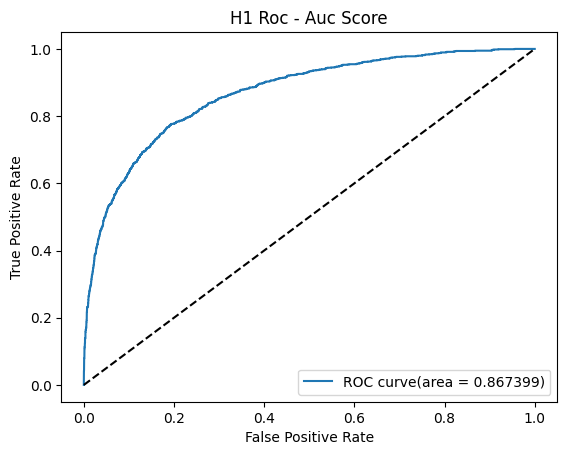

In [143]:
fpr, tpr, thresholds = roc_curve(y_test_h1, h1_tuned_roc)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve(area = %0.6f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('H1 Roc - Auc Score')
plt.legend(loc="lower right")
plt.show()

**- Plotting ROC Curve for Seasonal Vaccine.**

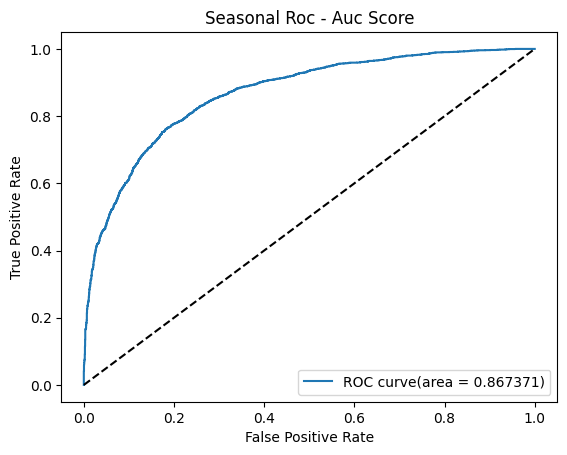

In [144]:
fpr, tpr, thresholds = roc_curve(y_test_seas, seas_tuned_roc)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve(area = %0.6f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Seasonal Roc - Auc Score')
plt.legend(loc="lower right")
plt.show()

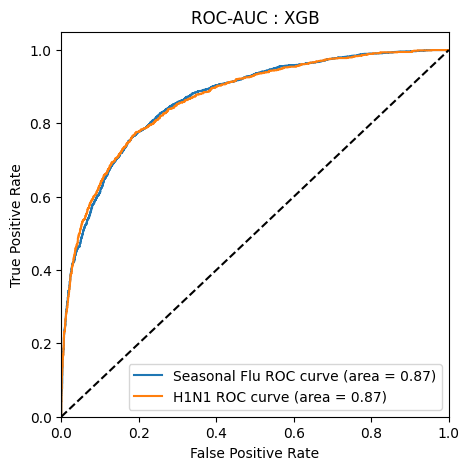

In [145]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt



models_dict = {"Seasonal Flu": (y_test_seas, seas_tuned_roc), "H1N1": (y_test_h1, h1_tuned_roc)} 
plt.figure(figsize=(5, 5))

for model_name, (y_test, y_score) in models_dict.items():
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{} ROC curve (area = {:.2f})'.format(model_name, roc_auc))


plt.plot([0, 1], [0, 1], 'k--')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC : XGB')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])


plt.show()

**- Checking the Feature Importance from XGB model for H1N1 vaccination.**

In [146]:
importance_scores_h1 = h1n1_model_tuned.get_booster().get_score(importance_type='weight')

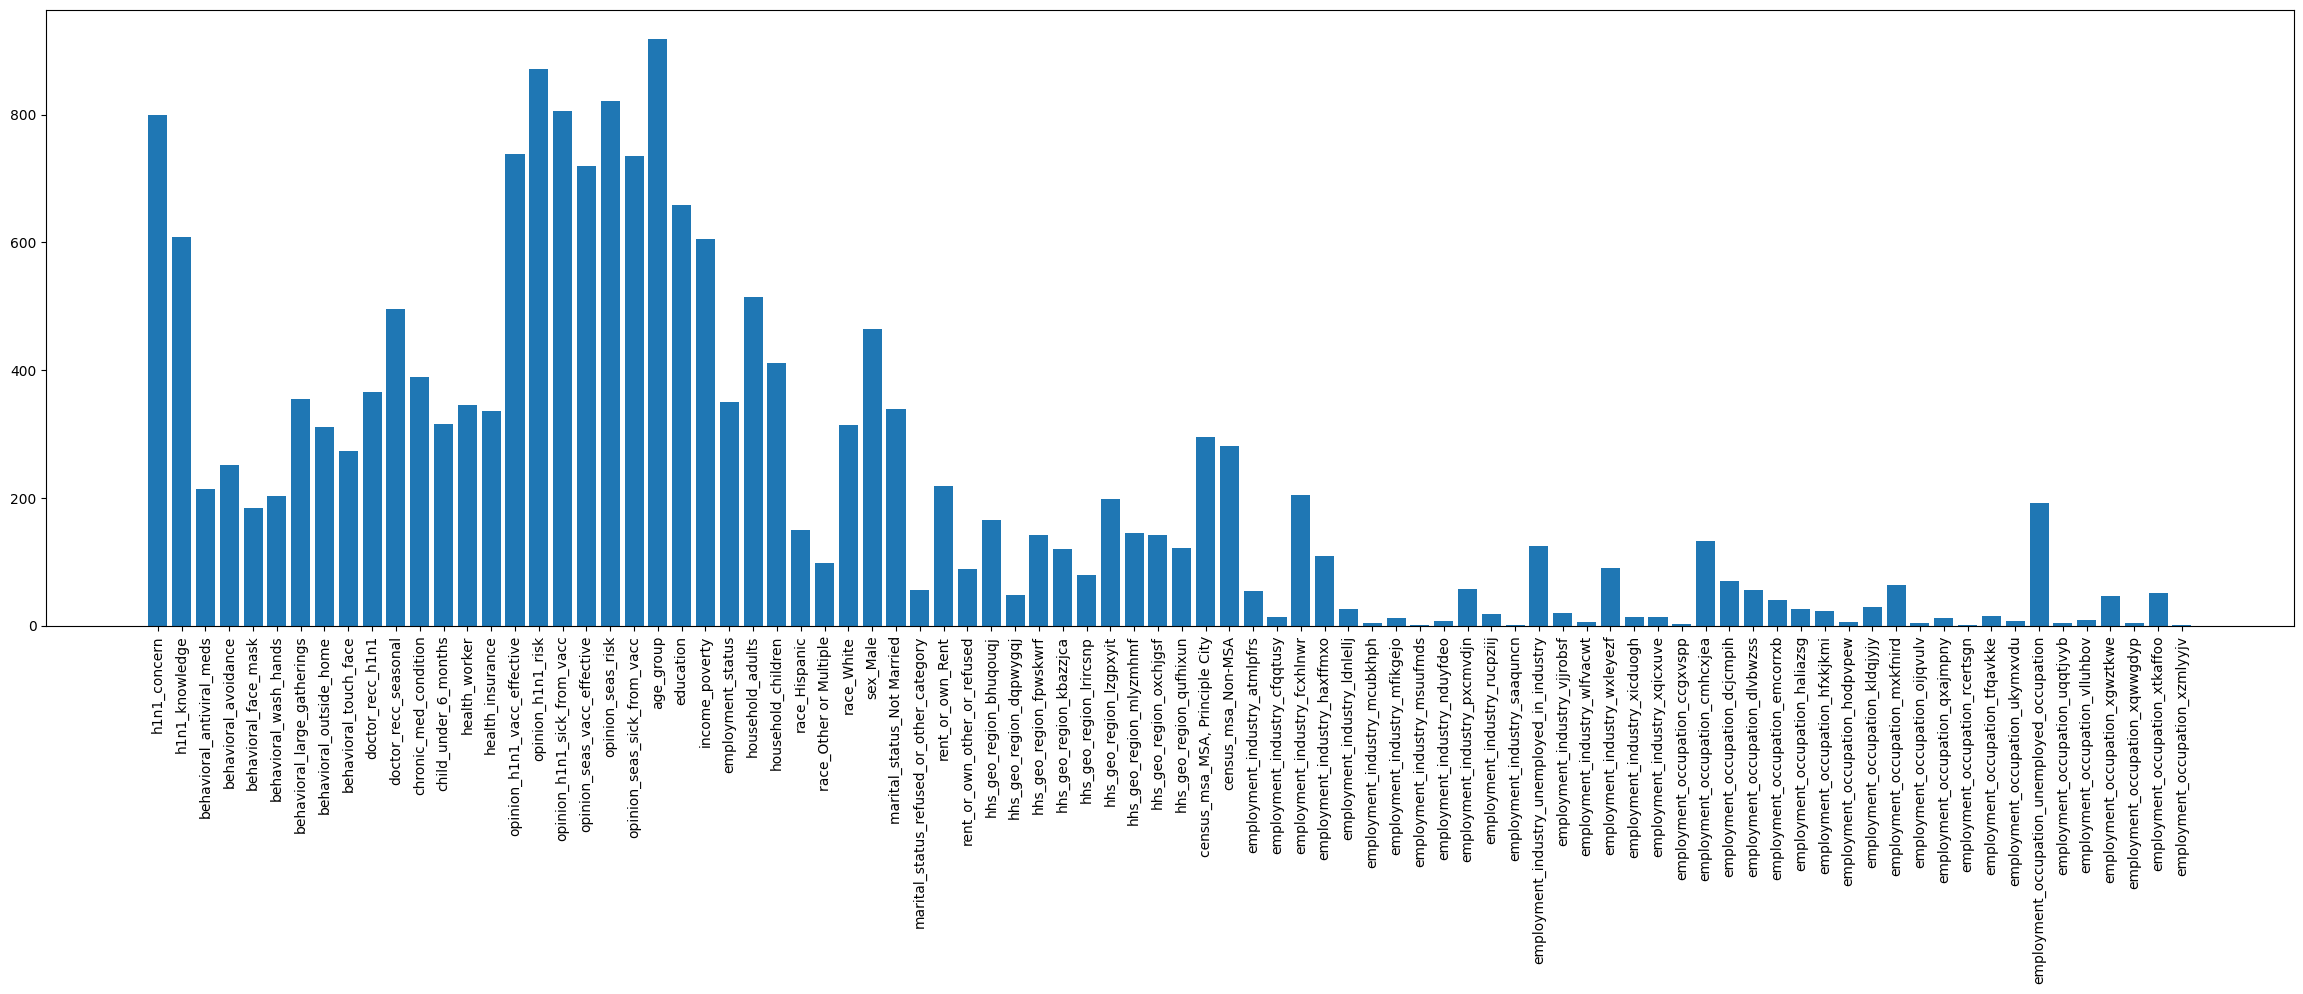

In [147]:
plt.figure(figsize=(29,8))
plt.bar(range(len(importance_scores_h1)), list(importance_scores_h1.values()),
        tick_label=list(importance_scores_h1.keys()))
plt.xticks(rotation=90)
plt.show()

**- Checking the Feature Importance from XGB model for Seasonal vaccination.**

In [160]:
importance_scores_seas = seasonal_model_tuned.get_booster().get_score(importance_type='weight')

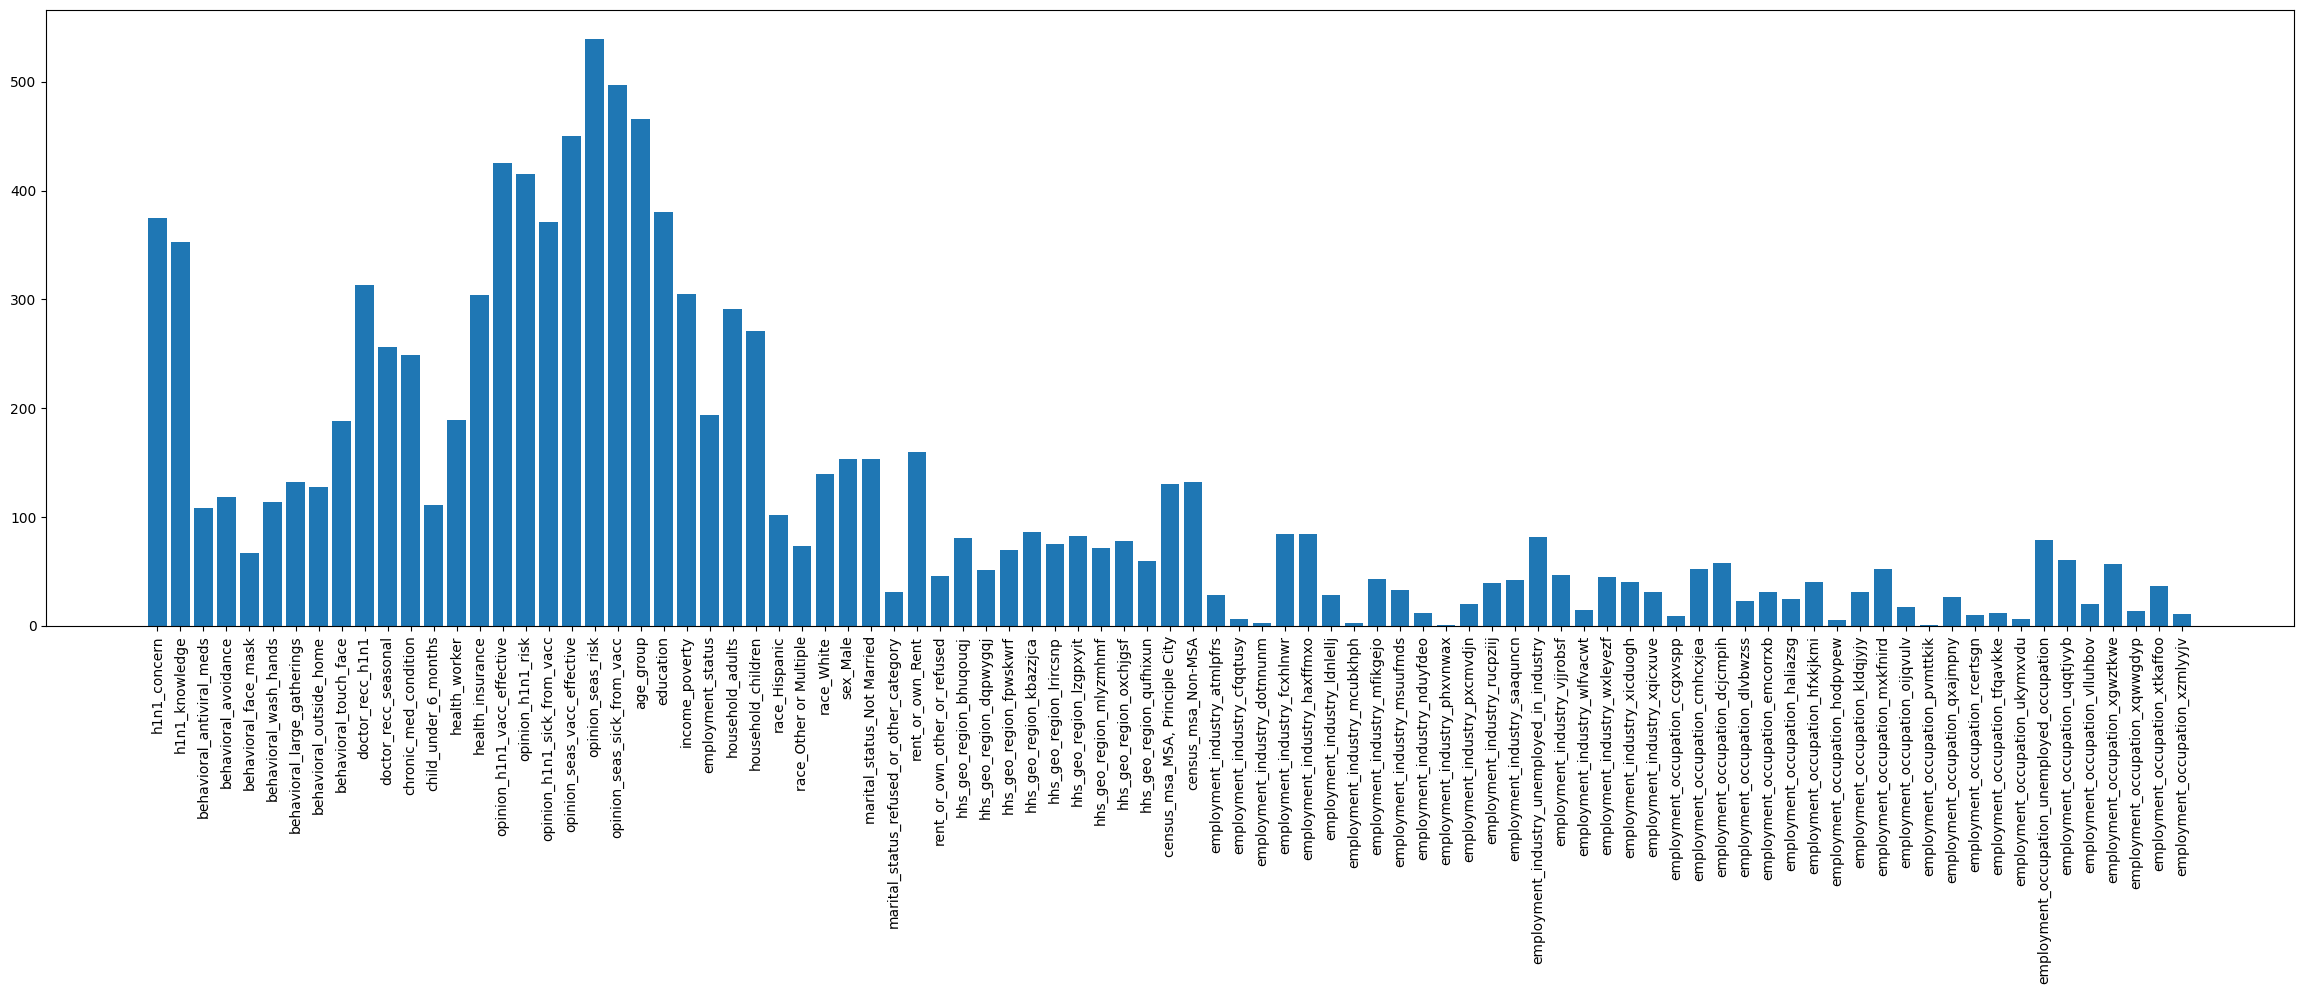

In [162]:
plt.figure(figsize=(29,8))
plt.bar(range(len(importance_scores_seas)), list(importance_scores_seas.values()),
        tick_label=list(importance_scores_seas.keys()))
plt.xticks(rotation=90)
plt.show()

<font size="5"> Predicting Probablility using CatBoost</font> <u>

- Since CatBoost takes more time to work, we used joblib and we are extracting information from the joblib.


    IMPORTANT Place the Joblib file and jupyter notebook should be in same directory.

In [ ]:
import joblib

In [ ]:
catBoost = joblib.load('H1_catBoost.joblib')

In [ ]:
h1 = catBoost.get_params()

**- Importing best parameters from the trained model using joblib**

In [ ]:
h1_params = {'iterations': 800,
 'learning_rate': 0.01763701383127006,
 'l2_leaf_reg': 17.4357146267731,
 'auto_class_weights': 'SqrtBalanced',
 'one_hot_max_size': 12,
 'random_strength': 5,
 'bagging_temperature': 1,
 'max_depth': 6,
 'max_bin': 10,
 'grow_policy': 'Depthwise',
 'min_data_in_leaf': 10}

**- Preparing CatBoost without encoding for H1N1**

In [ ]:
X_train_h1, X_test_h1, y_train_h1, y_test_h1 = train_test_split( training_minus_cat,
                                                    y1, test_size=0.2, random_state=101)

In [ ]:
categorical_features = np.where(X_train_h1.dtypes != float)[0]

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
h1_cat_model = CatBoostClassifier(**h1_params, cat_features= categorical_features)

In [ ]:
h1_cat_model.fit(X_train_h1, y_train_h1)

0:	learn: 0.6867346	total: 75.5ms	remaining: 1m
1:	learn: 0.6798440	total: 87.4ms	remaining: 34.9s
2:	learn: 0.6735085	total: 101ms	remaining: 26.9s
3:	learn: 0.6677781	total: 116ms	remaining: 23.2s
4:	learn: 0.6623219	total: 128ms	remaining: 20.4s
5:	learn: 0.6562700	total: 143ms	remaining: 18.9s
6:	learn: 0.6499714	total: 155ms	remaining: 17.6s
7:	learn: 0.6451306	total: 168ms	remaining: 16.6s
8:	learn: 0.6391739	total: 182ms	remaining: 16s
9:	learn: 0.6335811	total: 194ms	remaining: 15.3s
10:	learn: 0.6297299	total: 207ms	remaining: 14.8s
11:	learn: 0.6254197	total: 220ms	remaining: 14.4s
12:	learn: 0.6202522	total: 232ms	remaining: 14s
13:	learn: 0.6160956	total: 245ms	remaining: 13.7s
14:	learn: 0.6123456	total: 258ms	remaining: 13.5s
15:	learn: 0.6078965	total: 270ms	remaining: 13.2s
16:	learn: 0.6035815	total: 283ms	remaining: 13s
17:	learn: 0.5999348	total: 300ms	remaining: 13s
18:	learn: 0.5965491	total: 314ms	remaining: 12.9s
19:	learn: 0.5924425	total: 327ms	remaining: 12.7s

**- CatBoost Prediction and Evaluation for H1N1**

In [ ]:
h1_cat_predict = h1_cat_model.predict(X_test_h1)

In [ ]:
print(classification_report(y_test_h1, h1_cat_predict))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4199
           1       0.63      0.62      0.63      1143

    accuracy                           0.84      5342
   macro avg       0.77      0.76      0.76      5342
weighted avg       0.84      0.84      0.84      5342



In [ ]:
cat_model_roc = h1_cat_model.predict_proba(X_test_h1)[:, 1]

roc_auc = roc_auc_score(y_test_h1, cat_model_roc)

print('ROC - AUC score :' , roc_auc)

ROC - AUC score : 0.8681282070034173


**- Importing best parameters from the trained model using joblib**

In [ ]:
seas_catBoost = joblib.load('Seas_catBoost.joblib')

In [ ]:
seas = seas_catBoost.get_params()

In [ ]:
seas

{'iterations': 550,
 'learning_rate': 0.06926791313818945,
 'l2_leaf_reg': 1.173150972058299,
 'auto_class_weights': 'Balanced',
 'one_hot_max_size': 500,
 'random_strength': 1,
 'bagging_temperature': 1,
 'max_depth': 4,
 'max_bin': 30,
 'cat_features': array([ 0, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 34, 35]),
 'grow_policy': 'Depthwise',
 'min_data_in_leaf': 5}

In [ ]:
seas_params = {'iterations': 550,
 'learning_rate': 0.06926791313818945,
 'l2_leaf_reg': 1.173150972058299,
 'auto_class_weights': 'Balanced',
 'one_hot_max_size': 500,
 'random_strength': 1,
 'bagging_temperature': 1,
 'max_depth': 4,
 'max_bin': 30,
 'grow_policy': 'Depthwise',
 'min_data_in_leaf': 5}

**- Preparing CatBoost without encoding for Seasonal Flu**

In [ ]:
X_train_seas, X_test_seas, y_train_seas, y_test_seas = train_test_split(training_minus_cat,
                                                    y2, test_size=0.2, random_state=101)

In [ ]:
categorical_features = np.where(X_train_seas.dtypes != float)[0]

In [ ]:
seas_cat_model = CatBoostClassifier(**seas_params, cat_features= categorical_features)

In [ ]:
seas_cat_model.fit(X_train_seas, y_train_seas)

0:	learn: 0.6702299	total: 10.5ms	remaining: 5.78s
1:	learn: 0.6508964	total: 19.3ms	remaining: 5.28s
2:	learn: 0.6339686	total: 28ms	remaining: 5.11s
3:	learn: 0.6175778	total: 37.7ms	remaining: 5.14s
4:	learn: 0.6058941	total: 45.5ms	remaining: 4.96s
5:	learn: 0.5940838	total: 55.3ms	remaining: 5.02s
6:	learn: 0.5838184	total: 64.8ms	remaining: 5.02s
7:	learn: 0.5745303	total: 76.4ms	remaining: 5.18s
8:	learn: 0.5665310	total: 85.9ms	remaining: 5.17s
9:	learn: 0.5592085	total: 96.1ms	remaining: 5.19s
10:	learn: 0.5534023	total: 105ms	remaining: 5.16s
11:	learn: 0.5482994	total: 118ms	remaining: 5.29s
12:	learn: 0.5425638	total: 127ms	remaining: 5.26s
13:	learn: 0.5376782	total: 136ms	remaining: 5.21s
14:	learn: 0.5336651	total: 146ms	remaining: 5.2s
15:	learn: 0.5298810	total: 155ms	remaining: 5.17s
16:	learn: 0.5260255	total: 163ms	remaining: 5.12s
17:	learn: 0.5231888	total: 172ms	remaining: 5.09s
18:	learn: 0.5196638	total: 181ms	remaining: 5.05s
19:	learn: 0.5165015	total: 189ms	

**- CatBoost Prediction and Evaluation for Seasonal**

In [ ]:
seas_cat_predict = seas_cat_model.predict(X_test_seas)

In [ ]:
print(classification_report(y_test_seas, seas_cat_predict))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2823
           1       0.77      0.77      0.77      2519

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342



In [ ]:
cat_model_roc_seas = seas_cat_model.predict_proba(X_test_seas)[:, 1]

roc_auc = roc_auc_score(y_test_seas, cat_model_roc_seas)

print('ROC - AUC score :' , roc_auc)

ROC - AUC score : 0.8635176062562148


<font size="5"> Analysing Determinants of vaccination uptake </font> 

0 - Not taken the Vaccination 
<br>
1 - Taken the Vaccination

In [ ]:
df = pd.read_csv('training_set_features.csv')

In [ ]:
combined = pd.merge(df, label, on='respondent_id')

In [ ]:
combined.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  ...  rent_or_own   employment_status  \
0                    1.0  ...          Own  Not in Labor Force   
1                    1.0  ...         Rent            Employed   
2                    0.0  ...          Own            Employed   
3                    0.0  ...         Rent  Not in Labor Force   
4                    1.0  ...          Own            Employed   

   hhs_geo_region                census_msa  household_adults  \
0        oxchjgsf                   Non-MSA               0.0   
1        bhuqouqj  MSA, Not Principle  City               0.0   
2        qufhixun  MSA, Not Principle  City               2.0   
3        lrircsnp       MSA, Principle City               0.0   
4        qufhixun  MSA, Not Principle  City               1.0   

   household_children  employment_industry  employment_occupation  \
0                 0.0                  NaN                    NaN   
1                 0.0             pxcmvdjn               xgwztkwe   
2                 0.0             rucpziij               xtkaffoo   
3                 0.0                  NaN                    NaN   
4                 0.0             wxleyezf               emcorrxb   

   h1n1_vaccine  seasonal_vaccine  
0             0                 0  
1             0                 1  
2             0                 0  
3             0                 1  
4             0                 0  

[5 rows x 38 columns]

**- Comparing respondents got Vaccination by SEX**

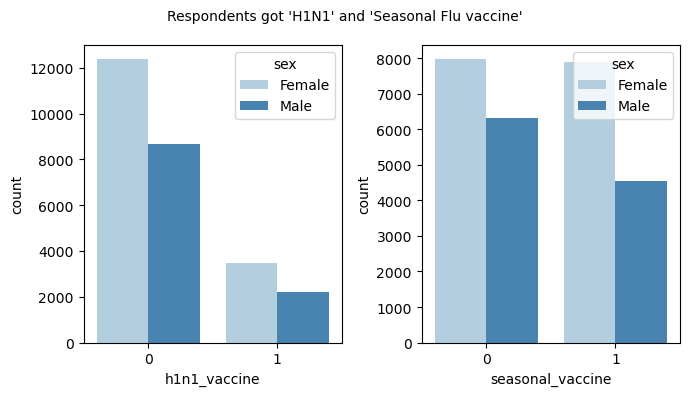

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

sns.countplot(x='h1n1_vaccine', data=combined, ax=axes[0], hue='sex', palette='Blues')
sns.countplot(x='seasonal_vaccine', data=combined, ax=axes[1], hue='sex',palette='Blues')

fig.subplots_adjust(wspace=0.6)

plt.suptitle("Respondents got 'H1N1' and 'Seasonal Flu vaccine'", ha='center', fontsize=10)
plt.tight_layout()
plt.show()

**- Analysing whether chronic medical condition people took vaccination**

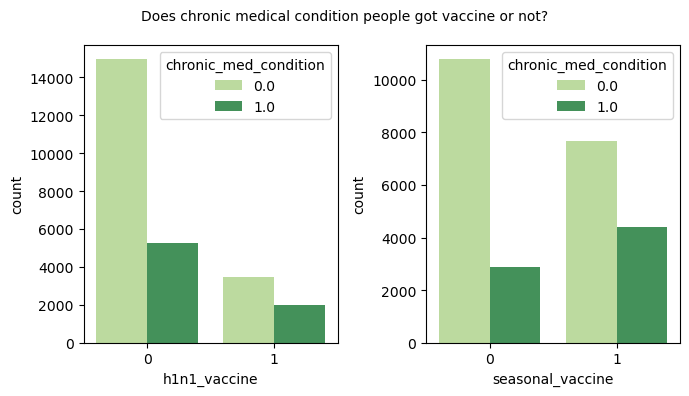

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

sns.countplot(x='h1n1_vaccine', data=combined, ax=axes[0], hue='chronic_med_condition', palette='YlGn')
sns.countplot(x='seasonal_vaccine', data=combined, ax=axes[1], hue='chronic_med_condition',palette='YlGn')

fig.subplots_adjust(wspace=0.6)

plt.suptitle("Does chronic medical condition people got vaccine or not?", ha='center', fontsize=10)
plt.tight_layout()
plt.show()

**- Comparing Age Group and people took Vaccination**

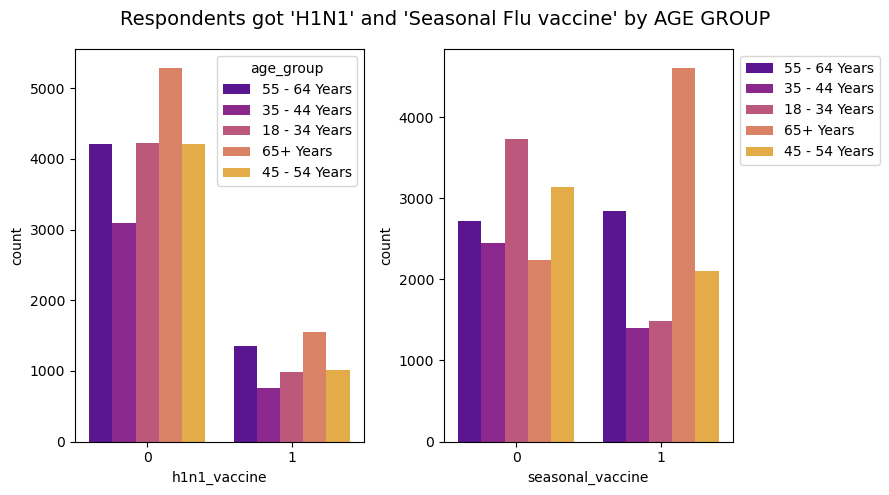

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 5))

sns.countplot(x='h1n1_vaccine', data=combined, ax=axes[0], hue='age_group', palette='plasma')
sns.countplot(x='seasonal_vaccine', data=combined, ax=axes[1], hue='age_group', palette='plasma')

fig.subplots_adjust(wspace=0.6)

plt.suptitle("Respondents got 'H1N1' and 'Seasonal Flu vaccine' by AGE GROUP", ha='center', fontsize=14)

handles, labels = axes[1].get_legend_handles_labels()

plt.legend(handles, labels, bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

**- Comparing Health Worker's vaccination status**

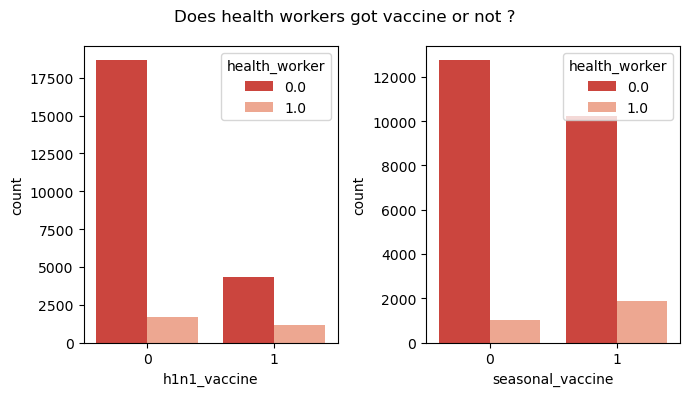

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

sns.countplot(x='h1n1_vaccine', data=combined, ax=axes[0], hue='health_worker', palette='Reds_r')
sns.countplot(x='seasonal_vaccine', data=combined, ax=axes[1], hue='health_worker',palette='Reds_r')

fig.subplots_adjust(wspace=0.6)

plt.suptitle("Does health workers got vaccine or not ?", ha='center')
plt.tight_layout()
plt.show()

**- Vaccination status based on people's concern and knowledge.**

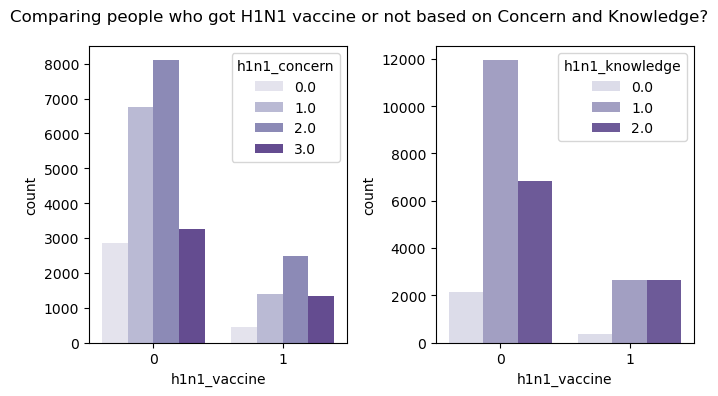

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

sns.countplot(x='h1n1_vaccine', data=combined, ax=axes[0], hue='h1n1_concern', palette='Purples')
sns.countplot(x='h1n1_vaccine', data=combined, ax=axes[1], hue='h1n1_knowledge',palette='Purples')

fig.subplots_adjust(wspace=0.6)

plt.suptitle("Comparing people who got H1N1 vaccine or not based on Concern and Knowledge?", ha='center')
plt.tight_layout()
plt.show()

**-Comparing people's opinion towards vaccine effectiveness and their vaccination status**

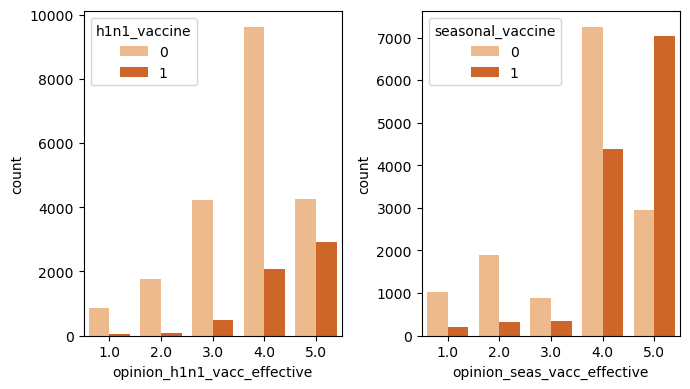

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

sns.countplot(x='opinion_h1n1_vacc_effective', data=combined, ax=axes[0], hue='h1n1_vaccine', palette='Oranges')
sns.countplot(x='opinion_seas_vacc_effective', data=combined, ax=axes[1], hue='seasonal_vaccine',palette='Oranges')

fig.subplots_adjust(wspace=0.6)

plt.tight_layout()
plt.show()

**- Checking whether Doctor's Recommendedation is Influencing respondents Vaccination status.**

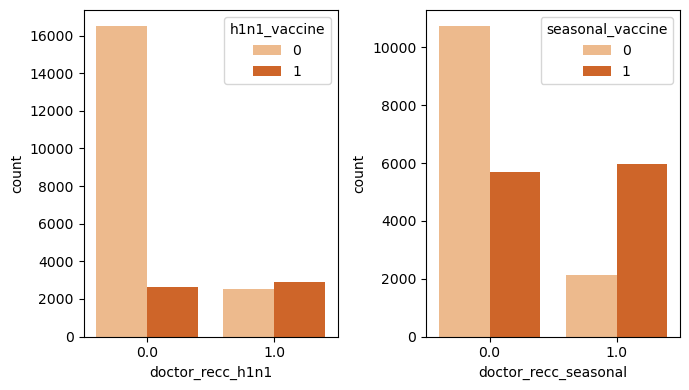

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

sns.countplot(x='doctor_recc_h1n1', data=combined, ax=axes[0], hue='h1n1_vaccine', palette='Oranges')
sns.countplot(x='doctor_recc_seasonal', data=combined, ax=axes[1], hue='seasonal_vaccine',palette='Oranges')

fig.subplots_adjust(wspace=0.6)

plt.tight_layout()
plt.show()

**- Comparing education level to the vaccination status**

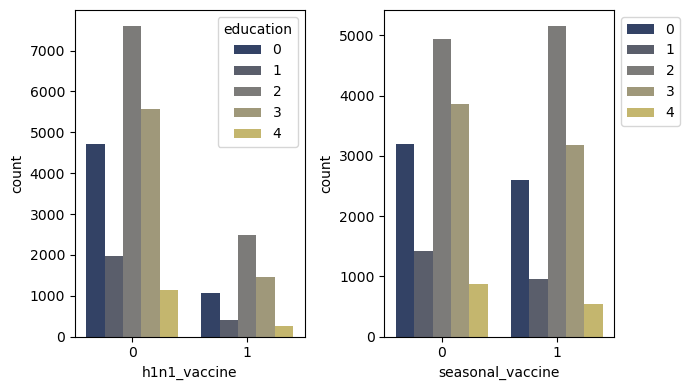

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))

sns.countplot(hue='education', data=combined, ax=axes[0], x='h1n1_vaccine', palette='cividis')
sns.countplot(hue='education', data=combined, ax=axes[1], x='seasonal_vaccine',palette='cividis')

handles, labels = axes[1].get_legend_handles_labels()
plt.legend(handles, labels, bbox_to_anchor=(1, 1), loc='upper left')

fig.subplots_adjust(wspace=0.6)

plt.tight_layout()
plt.show()

In [ ]:
h1_industry = px.histogram(combined, x='h1n1_vaccine', color='employment_industry',
                   barmode='group', histfunc='count', template='plotly_white',
                           
                  title="Total 'H1N1' Vaccination status Industry-wise")

h1_industry.show()

In [ ]:
seas_industry = px.histogram(combined, x='seasonal_vaccine', color='employment_industry',
                   barmode='group', histfunc='count', template='plotly_white',
                             
                  title="Total 'Seasonal Flu' Vaccination status Industry-wise")

seas_industry.show()

In [ ]:
h1_emp = px.histogram(combined, x='h1n1_vaccine', color='employment_occupation',
                   barmode='group', histfunc='count', template='plotly_white',
                      
                  title=" Total 'H1N1' Vaccination status Occupation-wise")

h1_emp.show()

In [ ]:
seas_emp = px.histogram(combined, x='seasonal_vaccine', color='employment_occupation',
                   barmode='group', histfunc='count', template='plotly_white',
                  title=" Total 'Seasonal Flu' Vaccination status Occupation-wise")

seas_emp.show()

**- Comparing vaccination uptake over hhs_geo_region**

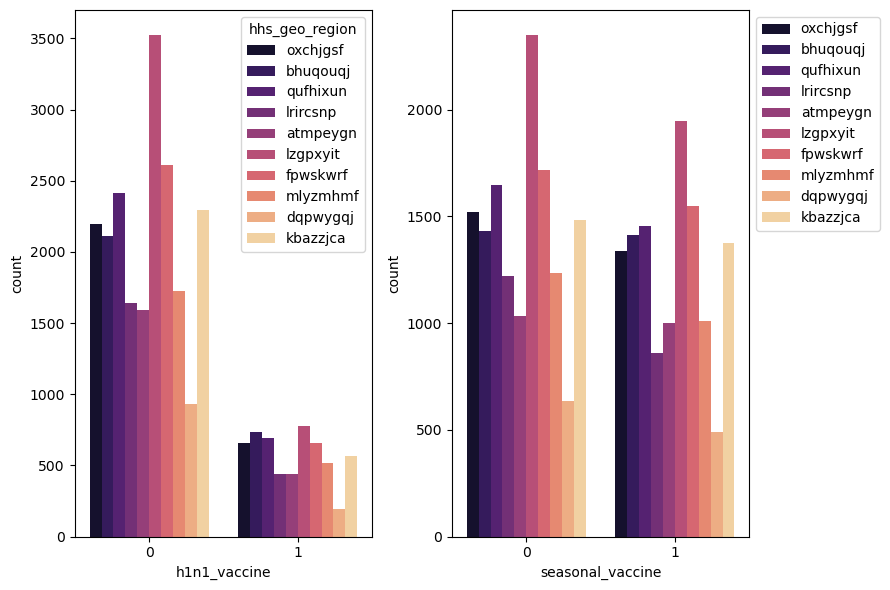

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 6))

sns.countplot(hue='hhs_geo_region', data=combined, ax=axes[0], x='h1n1_vaccine', palette='magma')
sns.countplot(hue='hhs_geo_region', data=combined, ax=axes[1], x='seasonal_vaccine',palette='magma',)

fig.subplots_adjust(wspace=0.6)

handles, labels = axes[1].get_legend_handles_labels()
plt.legend(handles, labels, bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

**- Comparing Census MSA over vaccination**

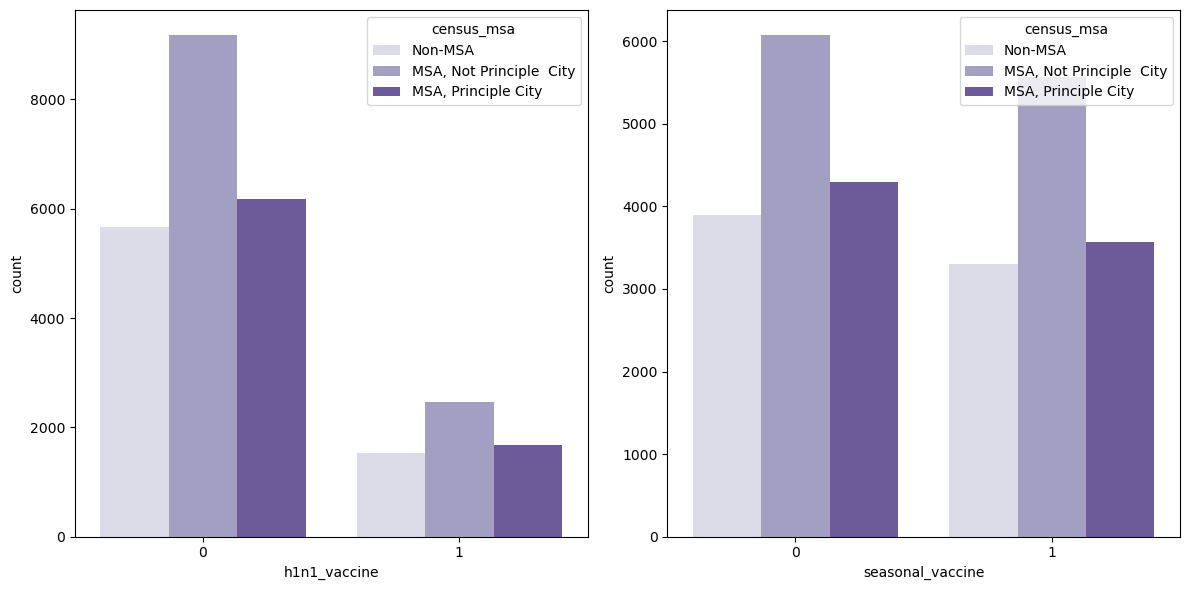

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

sns.countplot(hue='census_msa', data=combined, ax=axes[0], x='h1n1_vaccine', palette='Purples')
sns.countplot(hue='census_msa', data=combined, ax=axes[1], x='seasonal_vaccine',palette='Purples')

fig.subplots_adjust(wspace=0.6)

plt.tight_layout()
plt.show()

**- Comparing Income Poverty people over vaccination uptake**

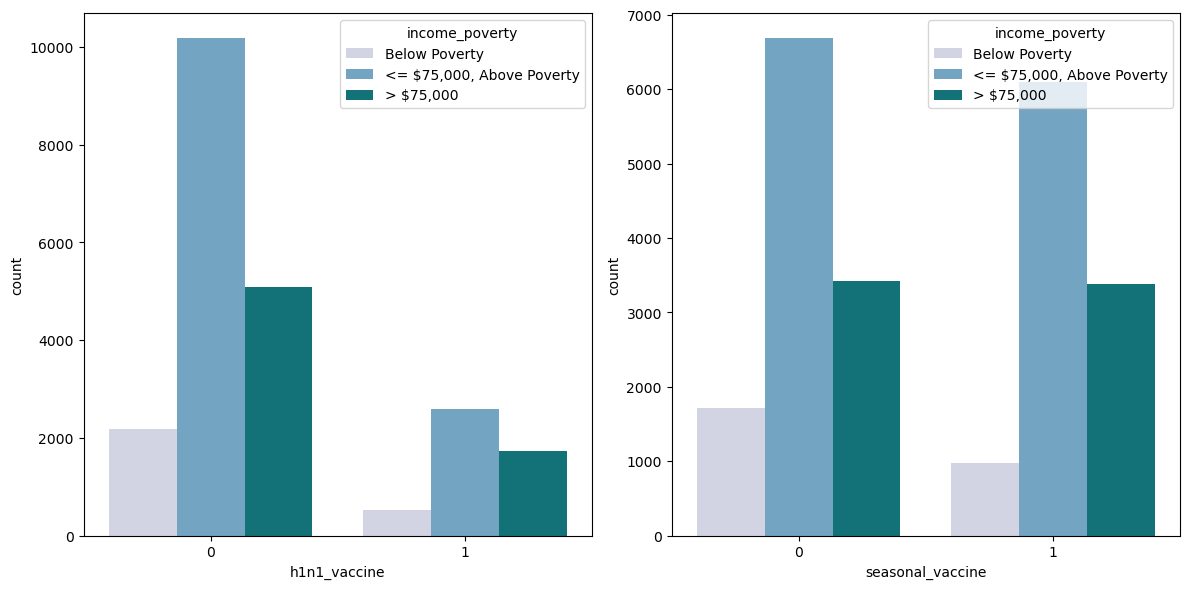

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

sns.countplot(hue='income_poverty', data=combined, ax=axes[0], x='h1n1_vaccine', palette='PuBuGn')
sns.countplot(hue='income_poverty', data=combined, ax=axes[1], x='seasonal_vaccine',palette='PuBuGn')

fig.subplots_adjust(wspace=0.6)

plt.tight_layout()
plt.show()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  ...  employment_occupation_ukymxvdu  \
0                    1.0  ...                               0   
1                    1.0  ...                               0   
2                    0.0  ...                               0   
3                    0.0  ...                               0   
4                    1.0  ...                               0   

   employment_occupation_unemployed_occupation  \
0                                            1   
1                                            0   
2                                            0   
3                                            1   
4                                            0   

   employment_occupation_uqqtjvyb  employment_occupation_vlluhbov  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   employment_occupation_xgwztkwe  employment_occupation_xqwwgdyp  \
0                               0                               0   
1                               1                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   employment_occupation_xtkaffoo  employment_occupation_xzmlyyjv  \
0                               0                               0   
1                               0                               0   
2                               1                               0   
3                               0                               0   
4                               0                               0   

   h1n1_vaccine  seasonal_vaccine  
0             0                 0  
1             0                 1  
2             0                 0  
3             0                 1  
4             0                 0  

[5 rows x 93 columns]

**- Comparing the Employment Status over** 

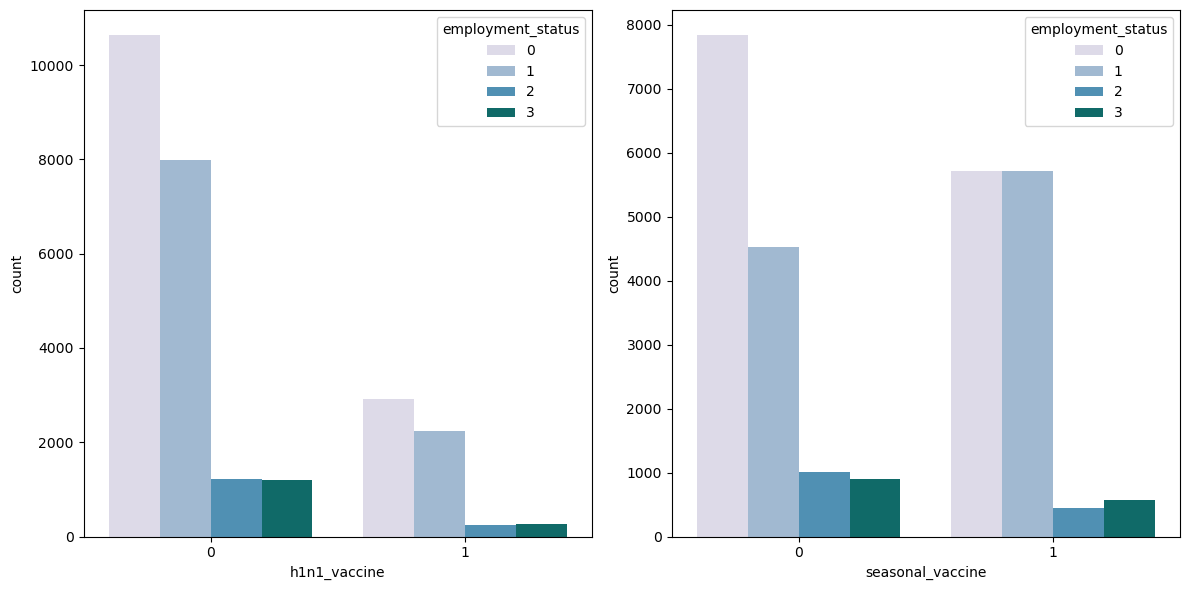

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

sns.countplot(hue='employment_status', data=combined, ax=axes[0], x='h1n1_vaccine', palette='PuBuGn')
sns.countplot(hue='employment_status', data=combined, ax=axes[1], x='seasonal_vaccine',palette='PuBuGn')

fig.subplots_adjust(wspace=0.6)

plt.tight_layout()
plt.show()

<font size="5"> Predicting the model for Driven Data Submission </font> 

In [164]:
test = pd.read_csv('test_set_features.csv')

In [165]:
test.shape

(26708, 36)

In [166]:
for i, row in test[test['employment_occupation'].isna()].iterrows():
    conditions = (test["employment_status"]=="Unemployed")
    if conditions.any():
        test.loc[i, 'employment_occupation'] = 'unemployed_occupation'
        
for i, row in test[test['employment_occupation'].isna()].iterrows():
    conditions = (test["employment_status"]=="Not in Labor Force")
    if conditions.any():
        test.loc[i, 'employment_occupation'] = 'Not_in_laborforce'
        
for i, row in test[test['employment_occupation'].isna()].iterrows():
    conditions = (test["employment_status"]=="Employed")
    if conditions.any():
        test.loc[i, 'employment_occupation'] = 'other_occupation'
        
for i, row in test[test['employment_industry'].isna()].iterrows():
    conditions = (test["employment_status"]=="Unemployed")
    if conditions.any():
        test.loc[i, 'employment_industry'] = 'unemployed_in_industry'
        
for i, row in test[test['employment_industry'].isna()].iterrows():
    conditions = (test["employment_status"]=="Not in Labor Force")
    if conditions.any():
        test.loc[i, 'employment_industry'] = 'Not_in_laborforce'
        
for i, row in test[test['employment_industry'].isna()].iterrows():
    conditions = (test["employment_status"]=="Employed")
    if conditions.any():
        test.loc[i, 'employment_industry'] = 'other_industry'
        
income_poverty_nan = 'refused_or_unknown'
marital_status_nan = 'refused_or_other_category'
employment_status_nan = 'refused_or_other_category'
rent_or_own_nan = 'other_or_refused'
education_nan = 'refused_or_unknown'


test['income_poverty'].fillna(income_poverty_nan, inplace=True)
test['marital_status'].fillna(marital_status_nan, inplace=True)
test['employment_status'].fillna(employment_status_nan, inplace=True)
test['rent_or_own'].fillna(rent_or_own_nan, inplace=True)
test['education'].fillna(education_nan, inplace=True)

In [167]:
for features in ordinal_columns:
    test[features] = le.fit_transform(test[features])

In [168]:
test = pd.get_dummies(test, columns=category_columns, drop_first=True)

In [173]:
test.drop('respondent_id', axis=1, inplace=True)

In [174]:
h1n1_test_proba = h1n1_model_tuned.predict_proba(test)

In [175]:
seas_test_proba = seasonal_model_tuned.predict_proba(test)

In [176]:
h1n1_probability = h1n1_test_proba[:,1].reshape(-1,1)

In [177]:
seasonal_probability = seas_test_proba[:,1].reshape(-1,1)

In [178]:
h1n1_probability

array([[0.11589237],
       [0.03201409],
       [0.20891039],
       ...,
       [0.19510196],
       [0.03006078],
       [0.5881722 ]], dtype=float32)

In [179]:
seasonal_probability

array([[0.26848447],
       [0.03161276],
       [0.6964265 ],
       ...,
       [0.1894084 ],
       [0.33501258],
       [0.6141564 ]], dtype=float32)

In [181]:
submission = pd.read_csv('submission_format.csv')

In [184]:
submission.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1, inplace=True)

In [186]:
submission['h1n1_vaccine'] = h1n1_probability

In [187]:
submission['seasonal_vaccine'] = seasonal_probability

In [188]:
submission.set_index("respondent_id",inplace=True)

In [189]:
submission.head()

h1n1_vaccine  seasonal_vaccine
respondent_id                                
26707              0.115892          0.268484
26708              0.032014          0.031613
26709              0.208910          0.696427
26710              0.758870          0.871766
26711              0.321442          0.531571